# 1 - Introduction
---

## 1.1 Identity

Nama : Husain Tsabit Abdur Rahim

Batch : FTDS H8 016 RMT

## 1.2 Problem Statement and Objective

Problem Statement : 

Membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank berdasarkan informasi penggunaan selama 6 bulan terakhir.

Objectictive : 

## 1.3 SQL Queries

`` select * from `ftds-hacktiv8-project.phase1_ftds_016_rmt.credit-card-information` where mod(CUST_ID,2) = 0 ``

## 1.4 About the Dataset

  <img src='https://i.ibb.co/2sbf0Js/P1-G4-Dataset-Information.png'>

# 2 - Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#splitting data
from sklearn.model_selection import train_test_split

# handling outliers
from feature_engine.outliers import Winsorizer

# feature scalling
from sklearn.preprocessing import MinMaxScaler

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# PCA
from sklearn.decomposition import PCA

# Untuk membuat model
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering,DBSCAN

from yellowbrick.cluster import KElbowVisualizer
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

import warnings
warnings.filterwarnings('ignore')

# 3 - Load Dataset

## 3.1 Import Dataset

In [2]:
# Load dataset
df = pd.read_csv('/Users/husaintsabit/Downloads/h8dsft_P1G4_husain_tsabit.csv')
df.head() #showing the first 5 rows of df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535              0.125      200.0               0.0   
1     1902   943.584041              0.875      103.0             103.0   
2     2322     1.979916              0.125       80.0              80.0   
3     3426   461.455720              1.000      585.0             585.0   
4     3976  1053.594730              1.000     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8

In [3]:
# showing the last 5 rows of dataset
df.tail() 

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

In [4]:
# Duplicate Dataset

df_copy = df.copy()

statement : Duplicate untuk antisipasi jika dibutuhkan data original.

## 3.2 Data Overview

In [5]:
# Overview of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

statement : Dataset terdiri dari 4475 rows dan 18 columns. Terdapat beberapa column yang memiliki missing values seperti pada column `CREDIT_LIMIT` dan `MINIMUM_PAYMENTS`, semua tipe datanya numerik.

In [6]:
df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4475.000000   4475.000000        4475.000000   4475.000000   
mean   4476.000000   1565.743939           0.877608   1003.158324   
std    2583.931114   2091.205727           0.235604   2210.812899   
min       2.000000      0.000000           0.000000      0.000000   
25%    2239.000000    132.536353           0.888889     40.065000   
50%    4476.000000    874.905296           1.000000    362.480000   
75%    6713.000000   2058.519163           1.000000   1122.640000   
max    8950.000000  19043.138560           1.000000  49039.570000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4475.000000             4475.000000   4475.000000   
mean         588.504849              415.025075    973.453671   
std         1666.500287              927.360842   2133.464502   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           29.990000               89.450000      0.000000   
75%          580.320000              484.255000   1098.569962   
max        40761.250000            22500.000000  29282.109150   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4475.000000                 4475.000000   
mean              0.490122                    0.202614   
std               0.399874                    0.298502   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.333333   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       4475.000000             4475.000000   
mean                           0.364989                0.134156   
std                            0.397336                0.199221   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.181818   
max                            1.000000                1.166667   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       4475.000000    4475.000000   4474.000000   4475.000000   
mean           3.196425      14.490503   4494.020175   1726.212274   
std            6.500169      24.156038   3668.535689   2961.258570   
min            0.000000       0.000000    150.000000      0.000000   
25%            0.000000       1.000000   1500.000000    390.206371   
50%            0.000000       7.000000   3000.000000    831.048408   
75%            4.000000      17.000000   6000.000000   1895.959003   
max          110.000000     358.000000  30000.000000  46930.598240   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4317.000000       4475.000000  4475.000000  
mean         854.429538          0.157206    11.516425  
std         2306.411178          0.295869     1.347819  
min            0.037744          0.000000     6.000000  
25%          169.814310          0.000000    12.000000  
50%          309.854995          0.000000    12.000000  
75%          830.395060          0.166667    12.000000  
max        61031.618600          1.000000    12.000000

statement : 

1. Balance merupakan saldo yang dimiliki oleh para users, yang mana rata-rata saldo dari 4475 user mempunyai saldo $1565 dengan saldo tertinggi $19043.
2. Balance frequency disini berisikan frekuensi user topup saldo pada akun mereka. disini untuk rata-ratanya yaitu  0.877.
3. Purchase atau pembelian yang dilakukan rata-rata dari seluruh user ada 1.003 kali, dengan pembelian paling banyak yaitu sebanyak 49.039 kali. 
4. Oneoff purchase, Jumlah (dollar) dalam sekali pembelian, pembelian tertinggi dalam sekali pembelian yaitu $40761
5. Installment purchase merupakan pembelian yang dilakuakan dengan metode cicilan, rata-rata user yang menggunakan credit card untuk belanja yaitu $415.
6. cash_advance merupakan pembayaran cash oleh user kepada bank, rata-rata pembayaran ada di angka $ 973,45, pembayaran ini lebih besar dibandingkan dengn rata-rata pinjamannya

# 4 - Exploratory Data Analysis

## 4.1 Check Data Distribution

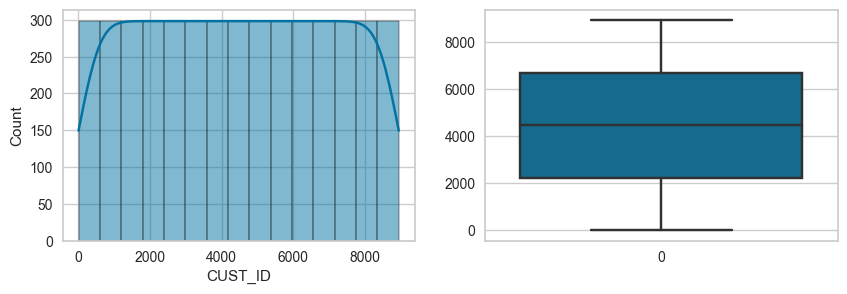

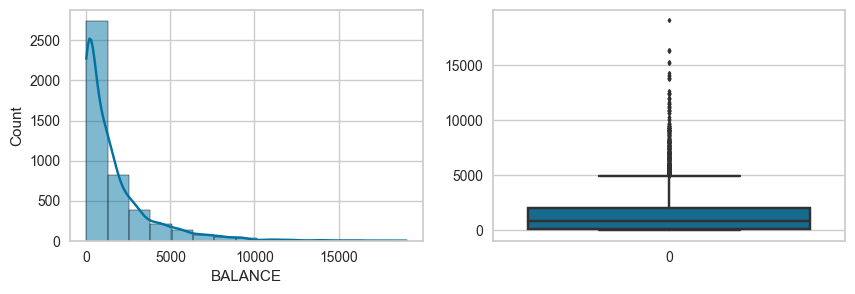

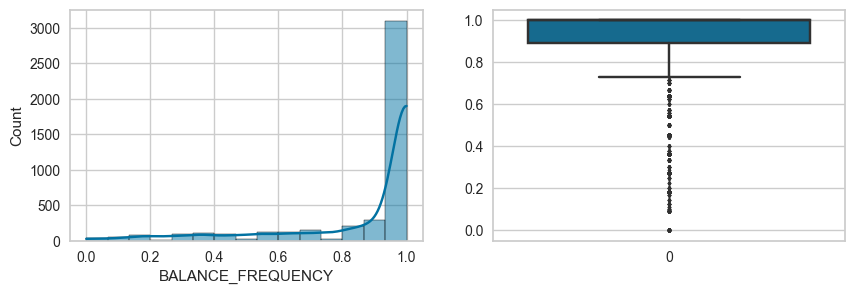

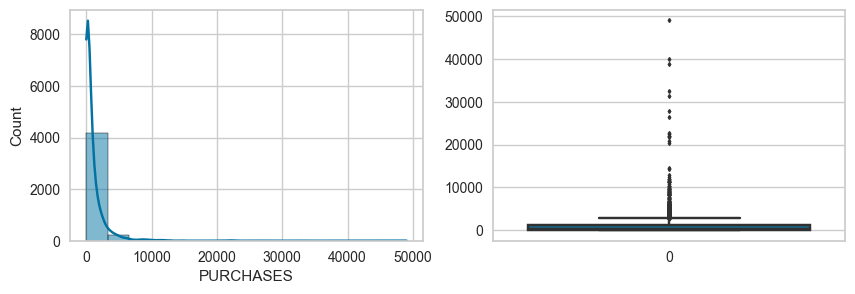

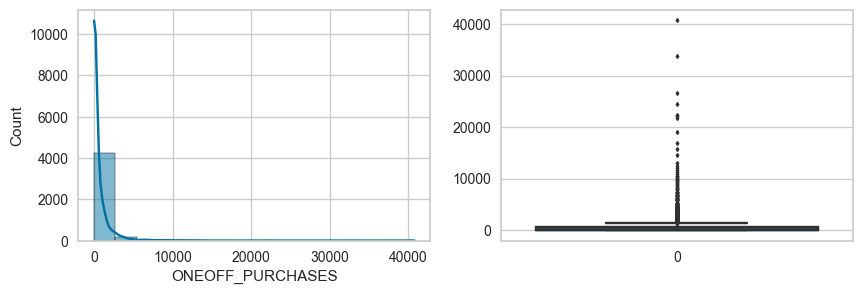

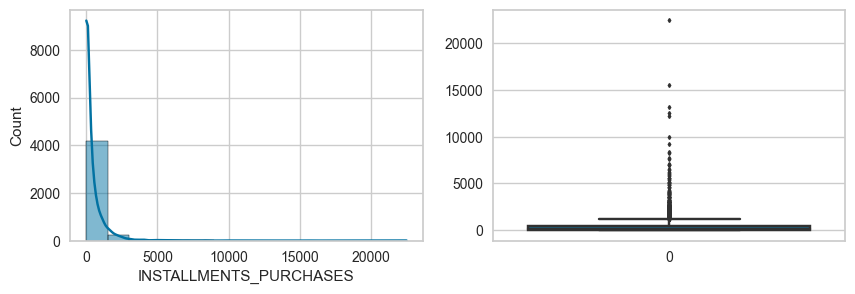

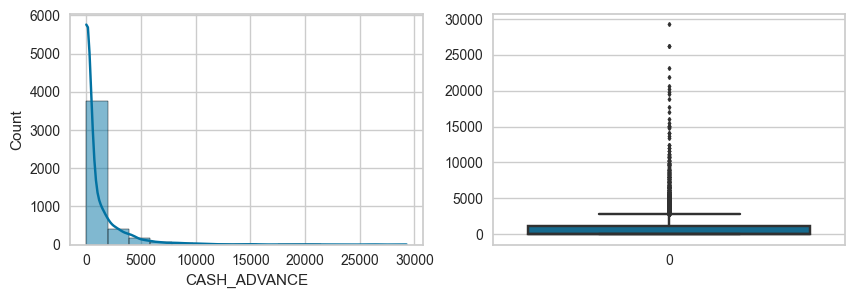

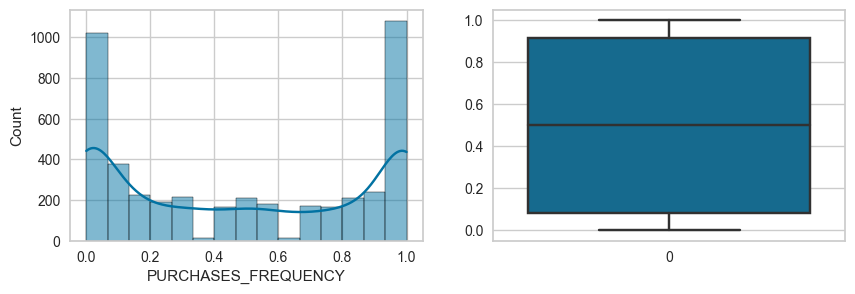

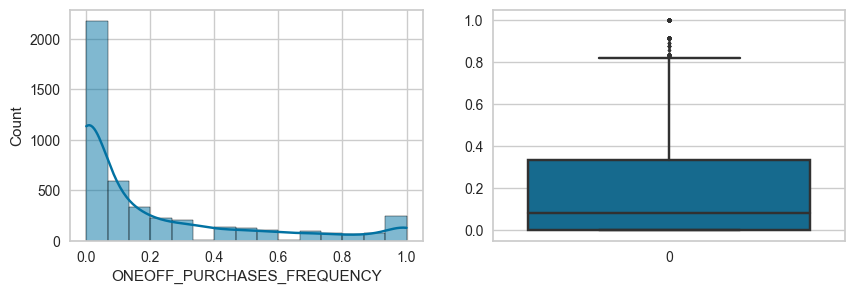

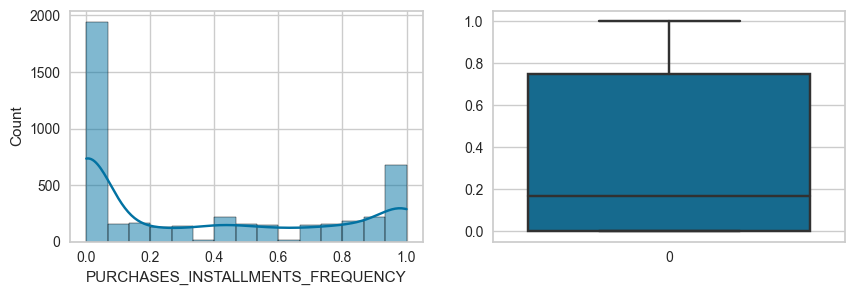

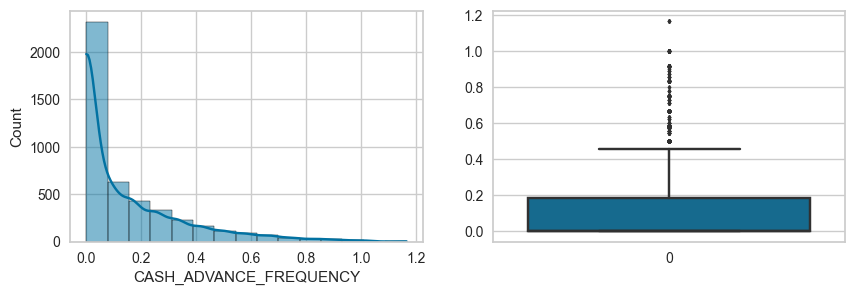

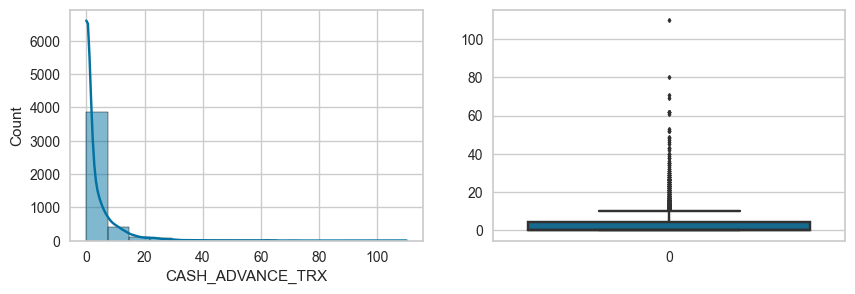

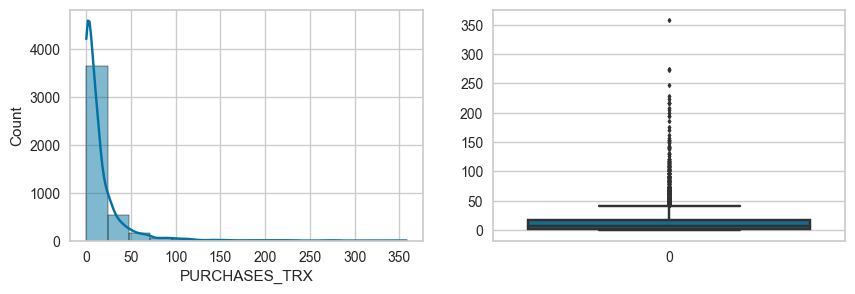

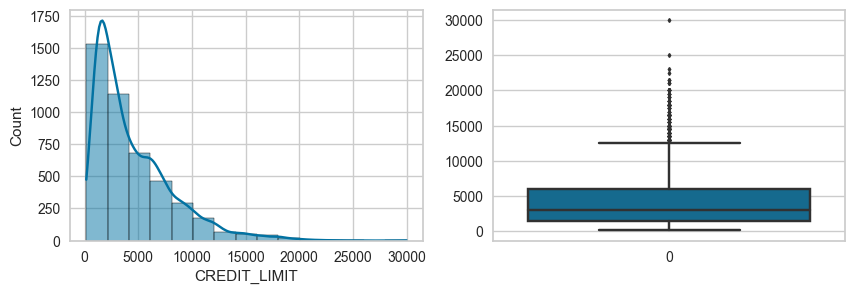

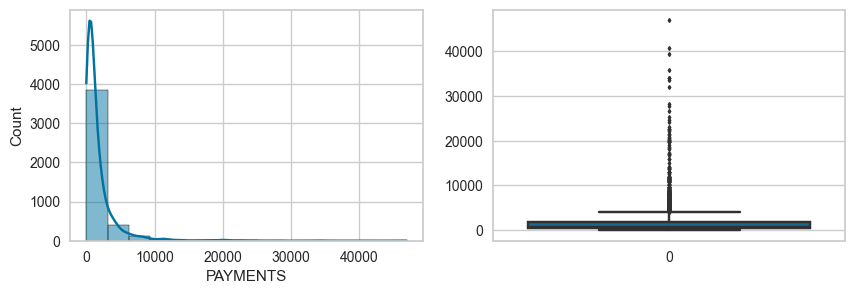

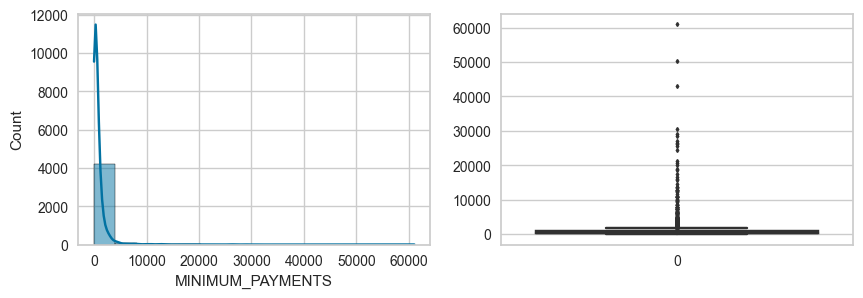

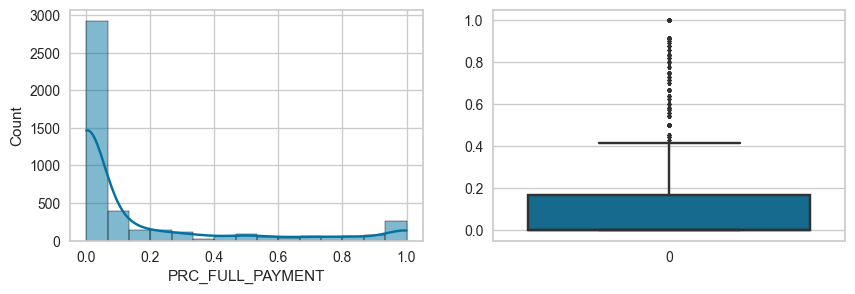

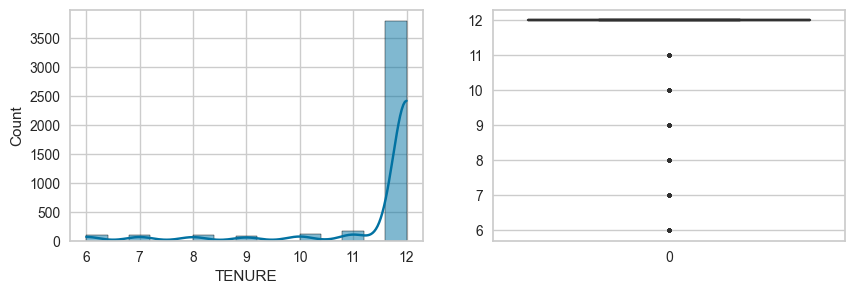

In [7]:
# Create distibution plot for analysis

num_col = [feature for feature in df.columns if df[feature].dtypes!='object']

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(10, 3))

    sns.histplot(df[i],bins=15, kde=True,ax=axs[0])
    sns.boxplot(df[i], ax = axs[1], fliersize=2)

statement : dapat dilihat bahwa mayoritas data berdistribusi skewed.

## 4.2 Correlation Between Collumns

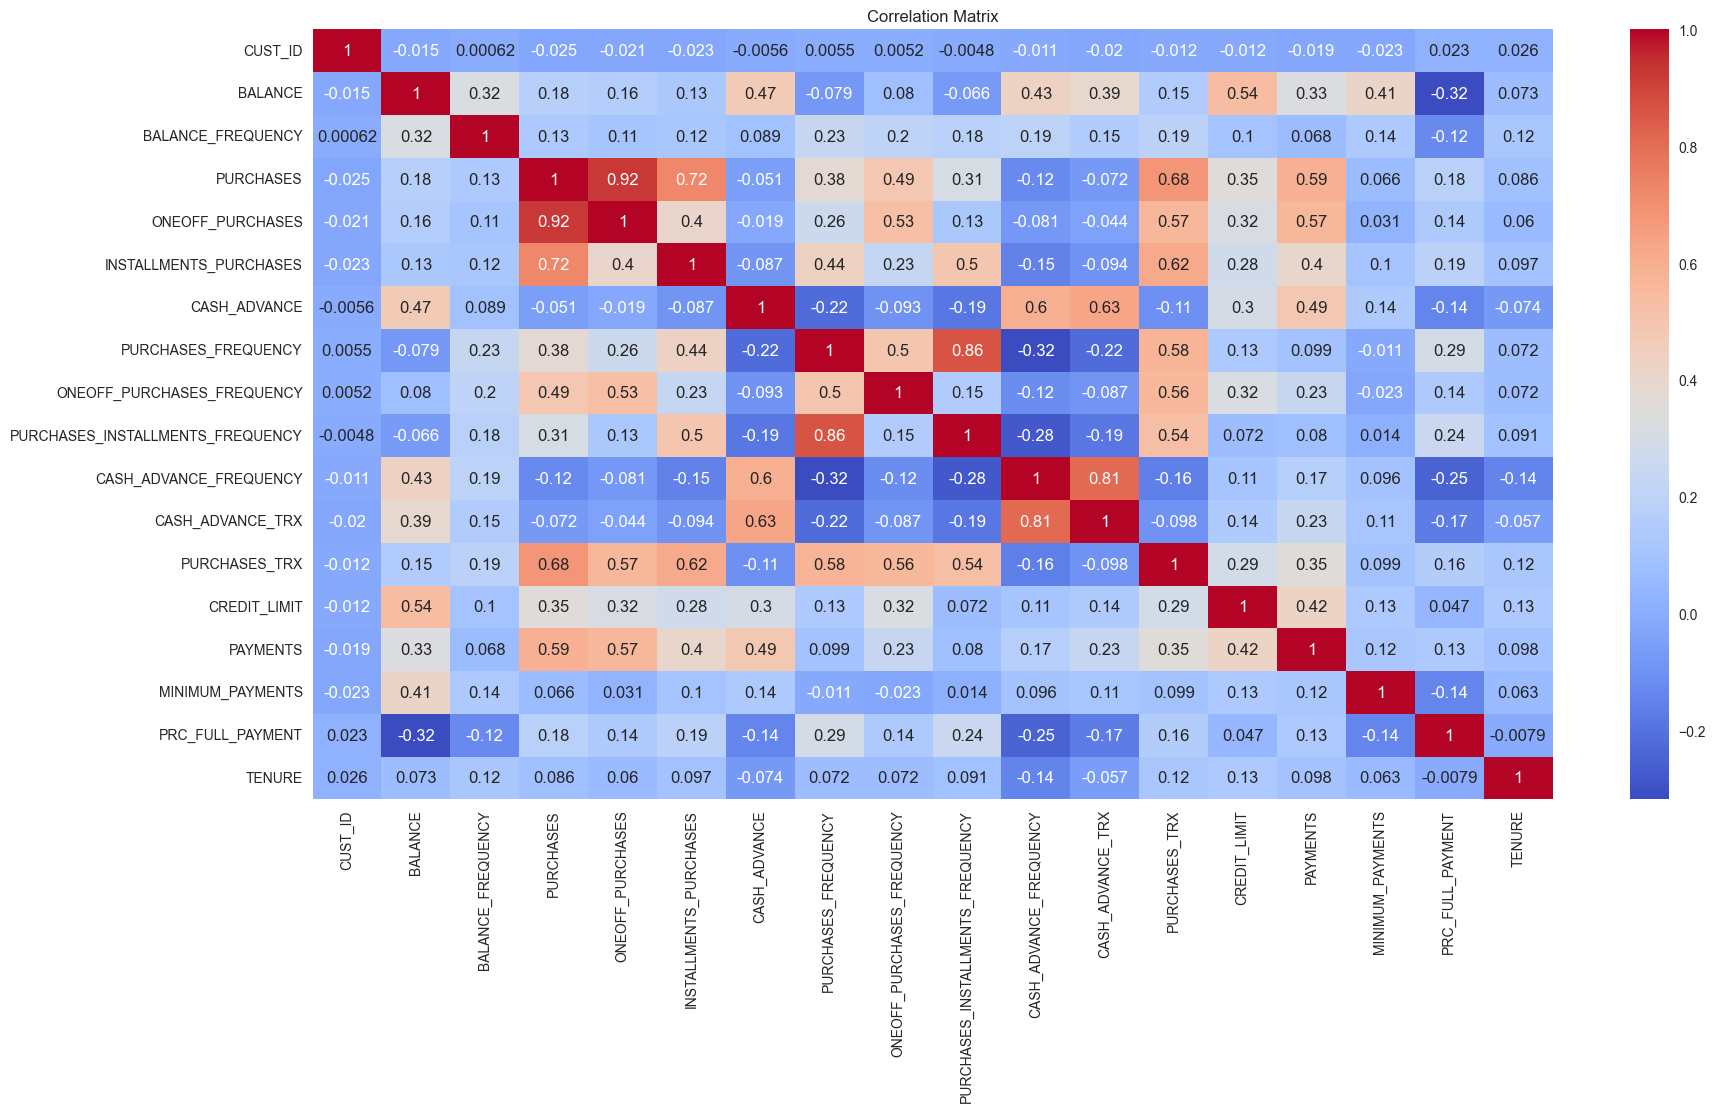

In [8]:
# create plot correlation

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

statement : 

Kita bisa melihat korelasi antar kolom pada dataset ini, berikut merupakan beberapa kolom yang memiliki korelasi yang tinggi (> 0.50) :

- balance dengan (credit limit),
- purchase dengan (payments, purchase_trx, installments_purchase, oneoff_purchase)
- oneoff purchases (payment, purchase trx, purchase trx)
- installments purchase ( purchase trx, purchases)
- cash advance (cash advance frequency, cash advance trx)
- purchases frequency (purchases installment frequency)
- oneoff purchase frequency (purchase trx, oneoff purchases)
- purchase installments frquency ( purchase trx)
- cash advance frequency(cash advance, cash advance trx)
- cash advance trx (cash advance frequency, cash advance)

## 4.3 Credit Limit Scatter Plot

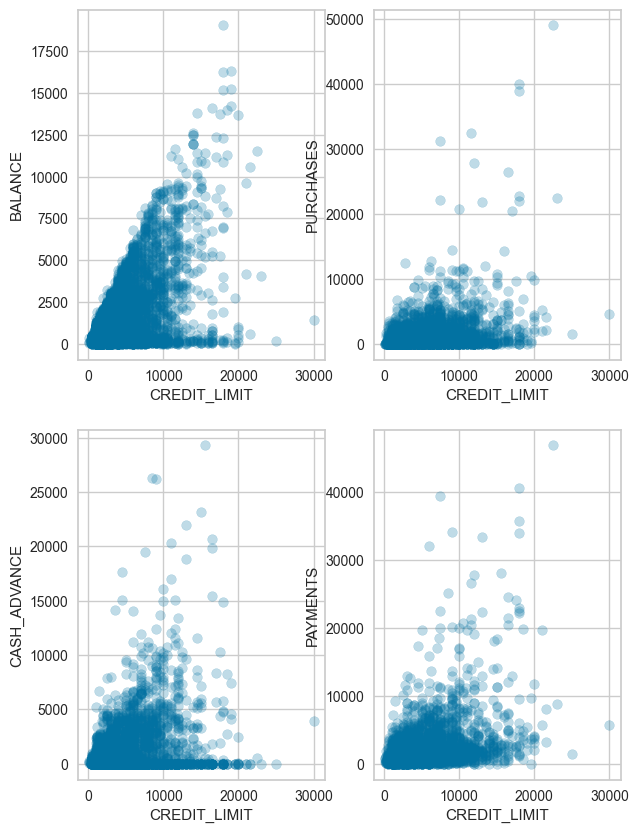

In [9]:
# Create scatter plot for analysis

plt.figure(figsize=(7,10))
columns = ['BALANCE', 'PURCHASES','CASH_ADVANCE', 'PAYMENTS']
n = 1
for x in columns:
    plt.subplot(2, 2, n)
    plt.scatter(df['CREDIT_LIMIT'], df[x], alpha=0.25)
    plt.xlabel('CREDIT_LIMIT')
    plt.ylabel(x)
    n=n+1

plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

analysis statement :

1. Balance atau saldo yang ada secara garis besar menggambarkan kondisi finansial customer, oleh karena itu jika semakin tinggi saldo yang dimiliki maka pihak kartu kredit akan memberikan limit kredit yang tinggi juga. Tetapi tidak 100% credit limit ini dipengaruhi oleh saldo karena pada scatter plot diatas masih ada cutomer yang memiliki saldo rendah tetapi memiliki limit kredit yang tinggi.

2. Purchase menggambarkan jumlah pembelanjaan dari setiap akun, kebanyakan para customer masih melakukan pembelanjaan sesuai dengan kemampuan kapasitas kartu kreditnya, mayoritas customer berbelanja kurang dari 10.000, akan tetapi ada beberapa customer yang melakukan pembelanjaan melebihi kapasitasnya.

3. Cash advance atau sejumlah cash yang dipegang oleh customer, para customer jarang yang melakukan penarikan hingga batas atas dari limitnya, walaupun terdapat beberapa user yang melakukan penarikan uang tunai hampir sejumlah dengan limit yang dimilikinya, namun kebanyakan dari mereka masih dibawah atau sesuai dengan limit yang dimilikinya.

4. Payment atau jumlah pembayaran yang sudah dilakukan customer kebanyakan masih sesuai dengan kapasitas limit dari kartu kredit itu sendiri, namun terdapat beberapa customer yang jumlah pembayarannya sudah melebihi batas dari limit kartu kredit yang diberikan.

# 5 - Data Preprocessing

## 5.1 Get Model Inference from Dataset

In [10]:
# getting 20 data for model inference
df_inf = df.sample(20, random_state=22) 

df_inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1025     7092   312.636004           1.000000    3866.29            808.12   
3191      112   360.671491           1.000000    3956.64              0.00   
1666      846    30.692503           0.454545     205.06              0.00   
1898     8312  2817.590920           1.000000      37.92              0.00   
3574     4176  7803.071972           1.000000    1000.55              0.00   
1487     4466    64.907748           0.727273     547.28            130.00   
4294     3568  1362.418281           1.000000    1477.44            900.00   
2121     5736   284.433780           0.363636     212.92              0.00   
3448      404  8040.732429           1.000000       0.00              0.00   
2332     3912   772.647723           0.875000       0.00              0.00   
3818     3744   561.157673           1.000000       0.00              0.00   
1012     6928  2933.577644           1.000000    4562.57           3729.83   
4345     3958  4433.582508           1.000000       0.00              0.00   
221      6320    10.564262           0.545455     240.25            240.25   
646      2744  2762.479434           1.000000    2702.47           1526.31   
1227      520   939.348677           1.000000      50.00             50.00   
905      5622   195.575108           1.000000    2984.34           2754.92   
3181     2658  4064.615698           1.000000     351.00              0.00   
2254     7616   132.993735           0.454545    1383.67           1358.77   
4224     8324  4530.205197           1.000000    1750.66            643.18   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1025                 3058.17      0.000000             1.000000   
3191                 3956.64    148.682192             1.000000   
1666                  607.76      0.000000             0.916667   
1898                   37.92      0.000000             0.166667   
3574                 1000.55   1490.239239             1.000000   
1487                  417.28      0.000000             0.333333   
4294                  577.44    451.968387             1.000000   
2121                  212.92      0.000000             0.833333   
3448                    0.00   3500.334072             0.000000   
2332                    0.00    970.371120             0.000000   
3818                    0.00    244.504364             0.000000   
1012                  832.74      0.000000             1.000000   
4345                    0.00   1434.153185             0.000000   
221                     0.00      0.000000             0.500000   
646                  1176.16      0.000000             1.000000   
1227                    0.00      0.000000             0.083333   
905                   229.42      0.000000             1.000000   
3181                  351.00   2412.042200             0.750000   
2254                   24.90      0.000000             0.416667   
4224                 1107.48  26268.699890             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1025                    1.000000                          1.000000   
3191                    0.000000                          1.000000   
1666                    0.000000                          1.000000   
1898                    0.000000                          0.166667   
3574                    0.000000                          1.000000   
1487                    0.083333                          0.250000   
4294                    0.111111                          0.888889   
2121                    0.000000                          0.833333   
3448                    0.000000                          0.000000   
2332                    0.000000                          0.000000   
3818                    0.000000                          0.000000   
1012                    0.750000                          0.916667   
4345                    0.000000                 

In [11]:
# drop data inference from dataset

df_train_test = df.drop(df_inf.index)
df_train_test

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        2

In [12]:
# reset indexing

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      7092   312.636004           1.000000    3866.29            808.12   
1       112   360.671491           1.000000    3956.64              0.00   
2       846    30.692503           0.454545     205.06              0.00   
3      8312  2817.590920           1.000000      37.92              0.00   
4      4176  7803.071972           1.000000    1000.55              0.00   
5      4466    64.907748           0.727273     547.28            130.00   
6      3568  1362.418281           1.000000    1477.44            900.00   
7      5736   284.433780           0.363636     212.92              0.00   
8       404  8040.732429           1.000000       0.00              0.00   
9      3912   772.647723           0.875000       0.00              0.00   
10     3744   561.157673           1.000000       0.00              0.00   
11     6928  2933.577644           1.000000    4562.57           3729.83   
12     3958  4433.582508           1.000000       0.00              0.00   
13     6320    10.564262           0.545455     240.25            240.25   
14     2744  2762.479434           1.000000    2702.47           1526.31   
15      520   939.348677           1.000000      50.00             50.00   
16     5622   195.575108           1.000000    2984.34           2754.92   
17     2658  4064.615698           1.000000     351.00              0.00   
18     7616   132.993735           0.454545    1383.67           1358.77   
19     8324  4530.205197           1.000000    1750.66            643.18   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  3058.17      0.000000             1.000000   
1                  3956.64    148.682192             1.000000   
2                   607.76      0.000000             0.916667   
3                    37.92      0.000000             0.166667   
4                  1000.55   1490.239239             1.000000   
5                   417.28      0.000000             0.333333   
6                   577.44    451.968387             1.000000   
7                   212.92      0.000000             0.833333   
8                     0.00   3500.334072             0.000000   
9                     0.00    970.371120             0.000000   
10                    0.00    244.504364             0.000000   
11                  832.74      0.000000             1.000000   
12                    0.00   1434.153185             0.000000   
13                    0.00      0.000000             0.500000   
14                 1176.16      0.000000             1.000000   
15                    0.00      0.000000             0.083333   
16                  229.42      0.000000             1.000000   
17                  351.00   2412.042200             0.750000   
18                   24.90      0.000000             0.416667   
19                 1107.48  26268.699890             1.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     1.000000                          1.000000   
1                     0.000000                          1.000000   
2                     0.000000                          1.000000   
3                     0.000000                          0.166667   
4                     0.000000                          1.000000   
5                     0.083333                          0.250000   
6                     0.111111                          0.888889   
7                     0.000000                          0.833333   
8                     0.000000                          0.000000   
9                     0.000000                          0.000000   
10                    0.000000                          0.000000   
11                    0.750000                          0.916667   
12                    0.000000                          0.000000   
13                    0.500000                          0.000000   
14                   

## 5.2 Handle Missing Values

In [13]:
# cek missing value
df.isnull().mean()


CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000223
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.035307
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

statement : karena pada column `CREDIT_LIMIT` terdapat missing values senilai 3.53% dan `MIMINUM_PAYMENT` 0.02% dari keseluruhan data, maka missing values akan di handle dengan melakukan imputation. Sebelum dilakukan imputation maka akan dilakukan pengecekan distribusi terlebih dahulu.

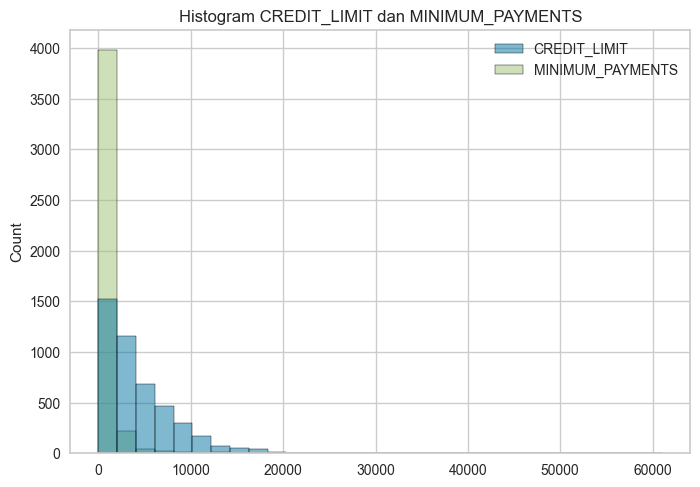

In [14]:
# jenis distribusi kolom
sns.histplot(df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']], bins=30)
plt.title('Histogram CREDIT_LIMIT dan MINIMUM_PAYMENTS')
plt.show()

Dapat dilihat bahwa pada kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS distribusinya adalah right-skew, maka akan digunakan median imputation untuk mengganti missing value.

In [15]:
# replace missing value CREDIT_LIMIT dan MINIMUM_PAYMENTS
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

In [16]:
# cek kembali missing value
df['CREDIT_LIMIT'].isnull().mean()
df['MINIMUM_PAYMENTS'].isnull().mean()

0.0

## 5.3 Handle Outlier

In [17]:
# Membuat fungsi untuk membuat histogram dan boxplot bagi data
def hist_boxplot(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print('skewness:', df[variable].skew())
    if (df[variable].skew() <= -0.5 ) | (df[variable].skew() >= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

melihat distribusi data sebelum handling outlier

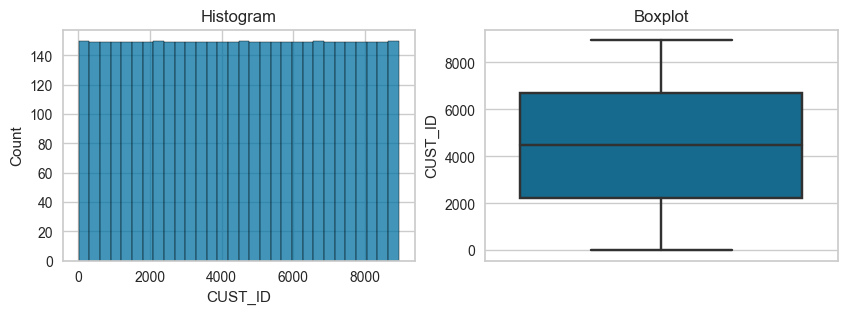

skewness: 0.0
the distribution is normal


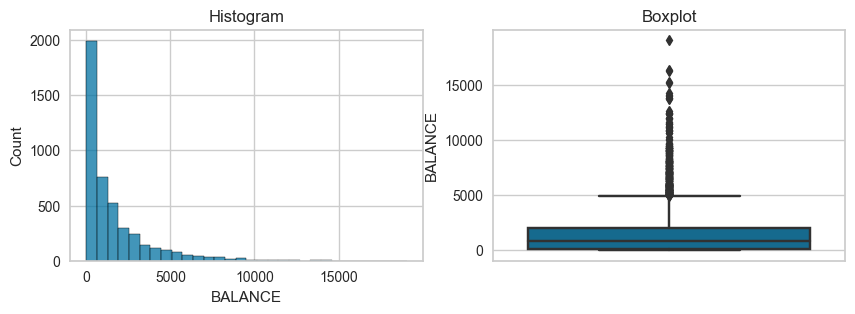

skewness: 2.456620962191608
the distribution is skewed


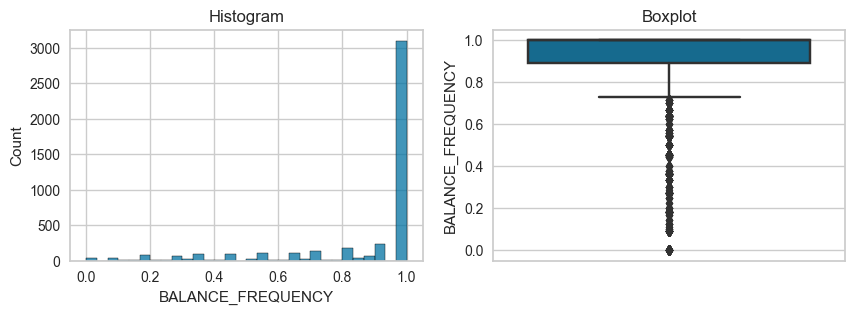

skewness: -2.020309250153954
the distribution is skewed


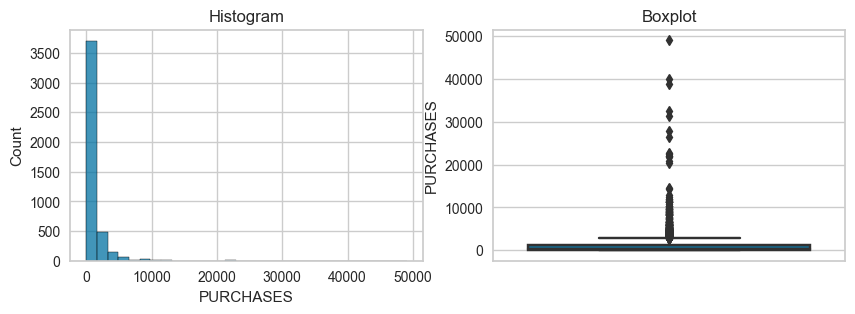

skewness: 8.987051591977552
the distribution is skewed


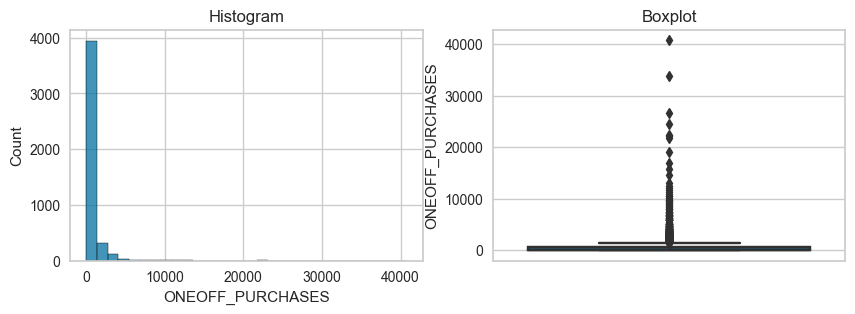

skewness: 10.140058770209015
the distribution is skewed


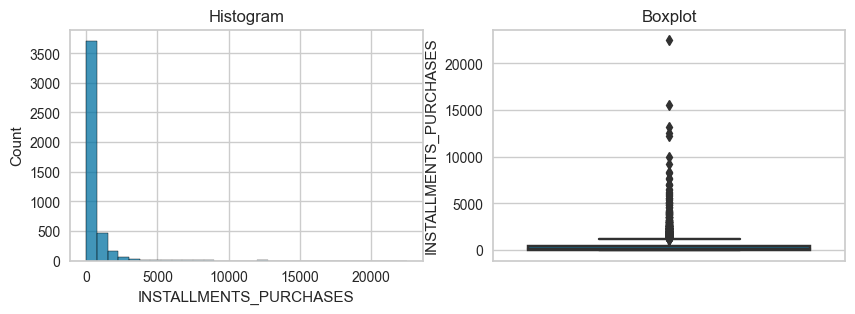

skewness: 8.116887369354234
the distribution is skewed


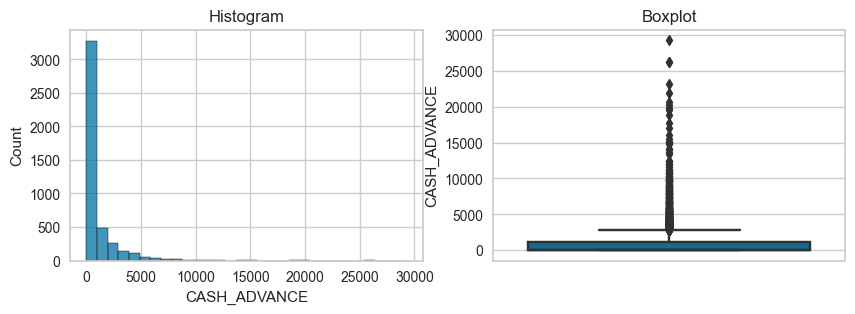

skewness: 4.739677538274201
the distribution is skewed


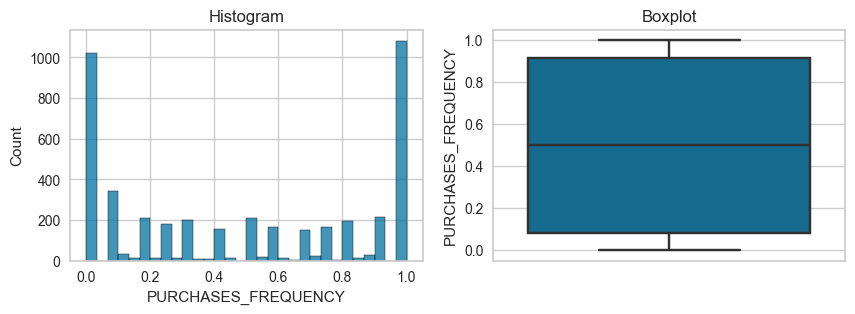

skewness: 0.06159754482450298
the distribution is normal


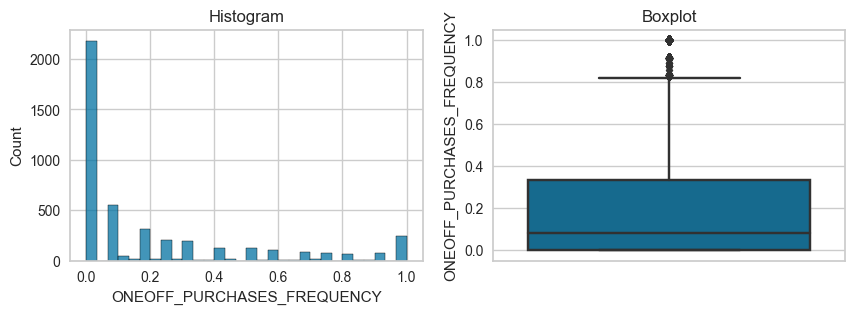

skewness: 1.5234554787719887
the distribution is skewed


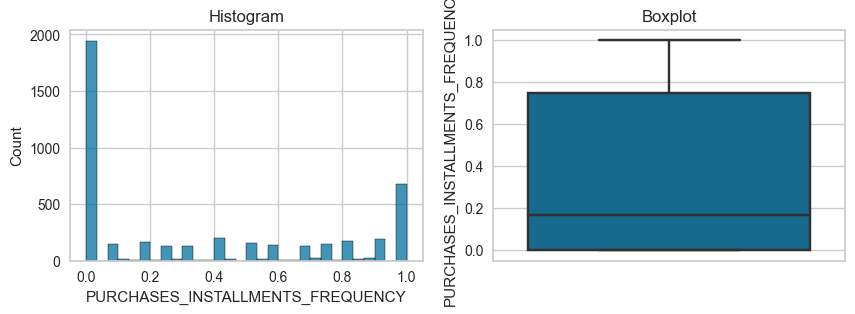

skewness: 0.5102876658863782
the distribution is skewed


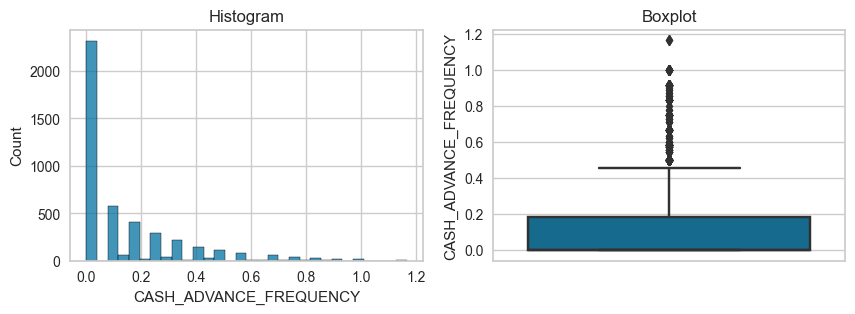

skewness: 1.8233800138256115
the distribution is skewed


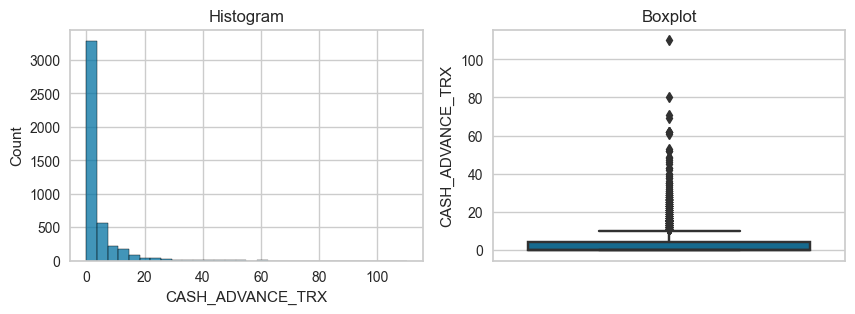

skewness: 4.75278000331602
the distribution is skewed


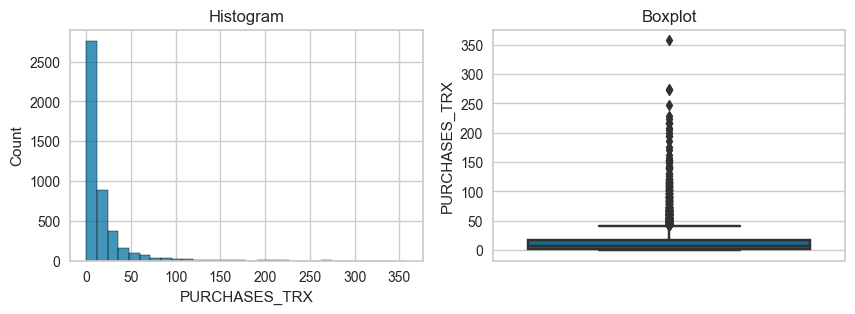

skewness: 4.480452469147952
the distribution is skewed


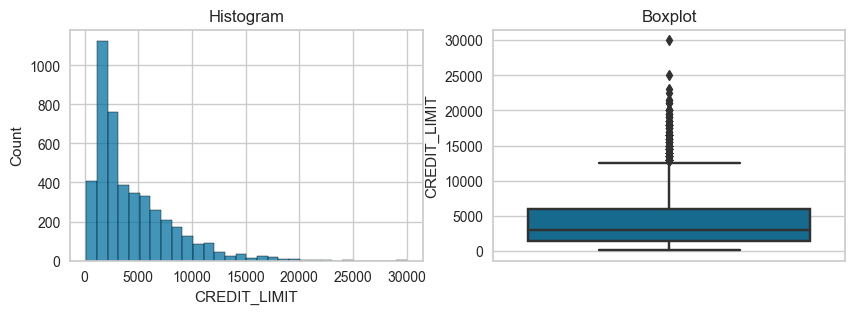

skewness: 1.545422651648898
the distribution is skewed


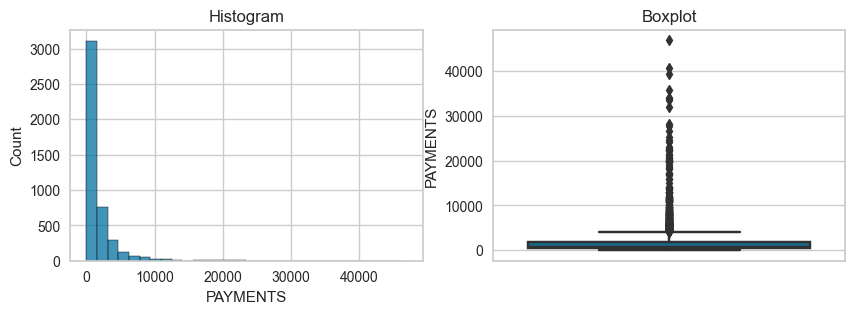

skewness: 6.040773400922328
the distribution is skewed


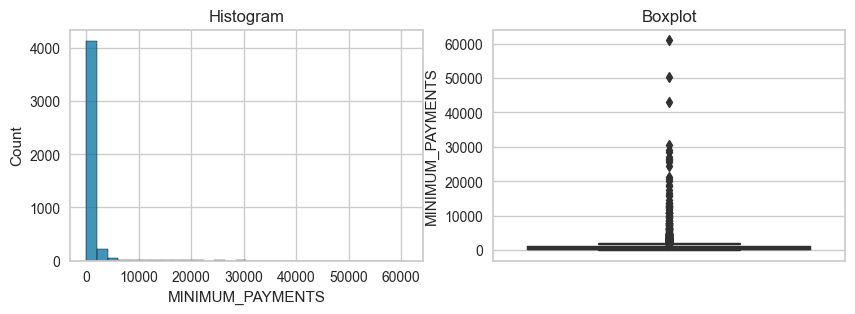

skewness: 12.56971436375272
the distribution is skewed


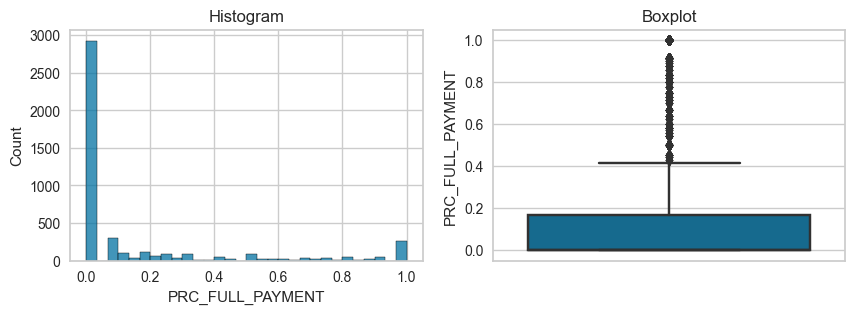

skewness: 1.9116495684046537
the distribution is skewed


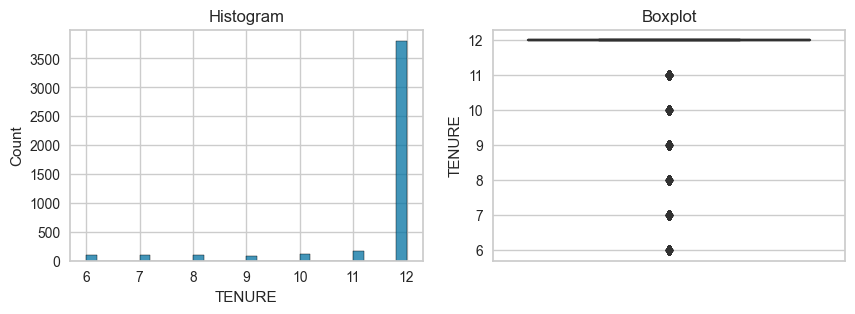

skewness: -2.9328221430257617
the distribution is skewed


In [18]:
# showing histogram dan boxplot in dataset
for i in df:
    hist_boxplot(df, i)

In [19]:
# kolom yang akan dihandling outliersnya
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
        'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


In [20]:
# membuat capper dengan menggunakan median imputation
windsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=cols)

# fit dan transform data
df_handle = windsoriser.fit_transform(df)

selanjutnya yaitu melihat distribusi data setelah melakukan capping untuk handling outlier 

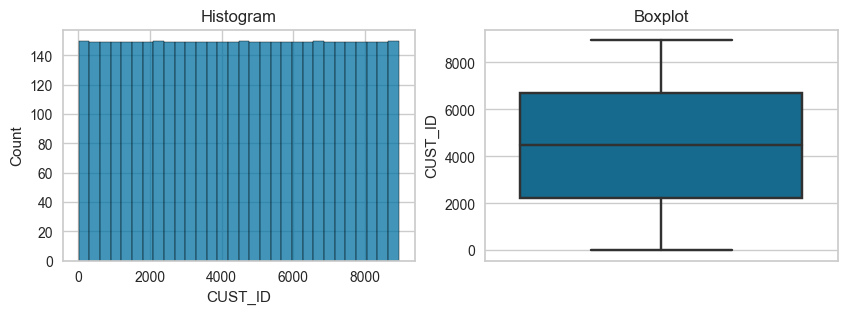

skewness: 0.0
the distribution is normal


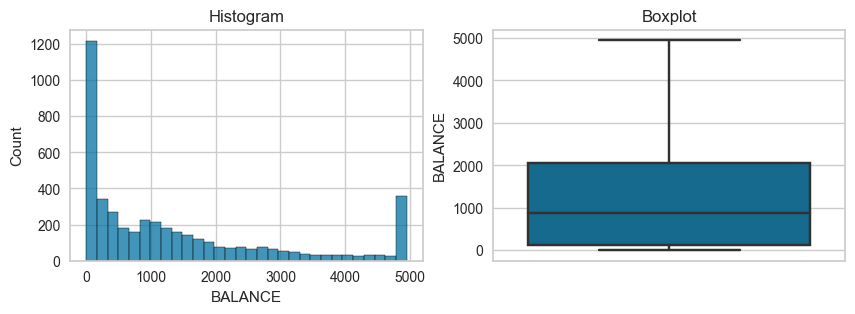

skewness: 1.1657259121091936
the distribution is skewed


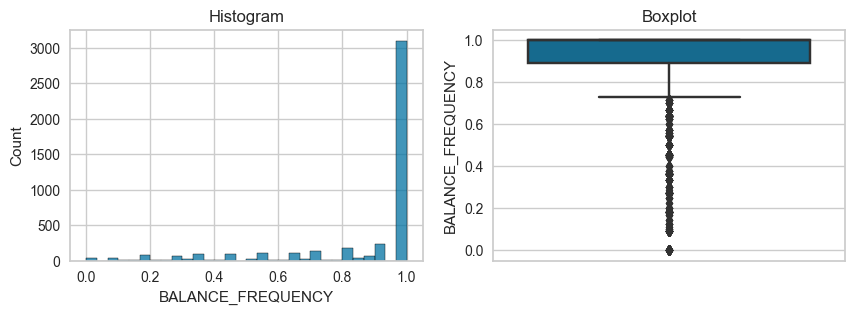

skewness: -2.020309250153954
the distribution is skewed


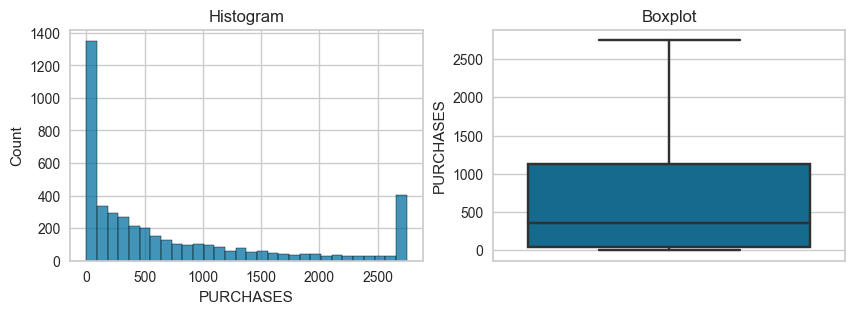

skewness: 1.2075019477372246
the distribution is skewed


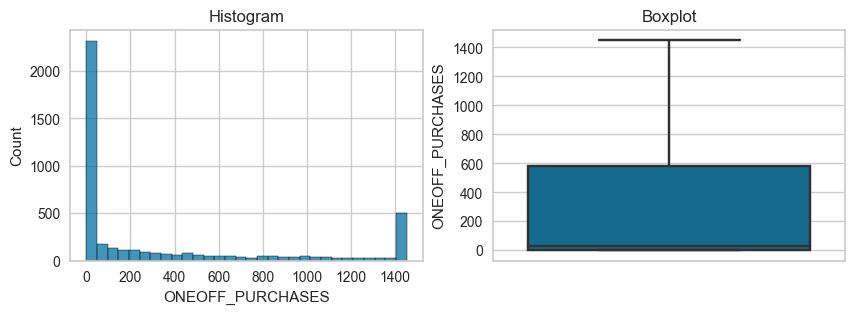

skewness: 1.2283840370656014
the distribution is skewed


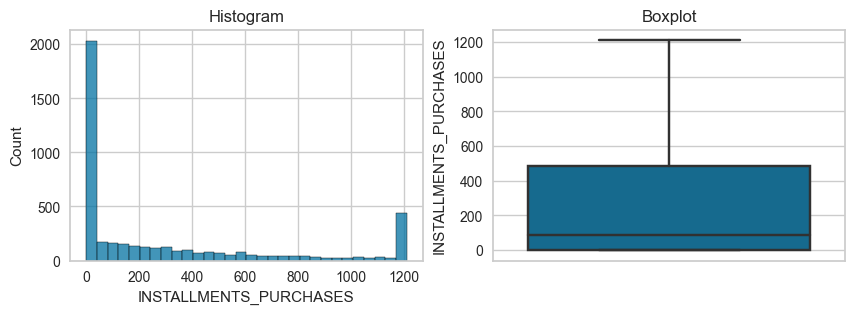

skewness: 1.2283331745312547
the distribution is skewed


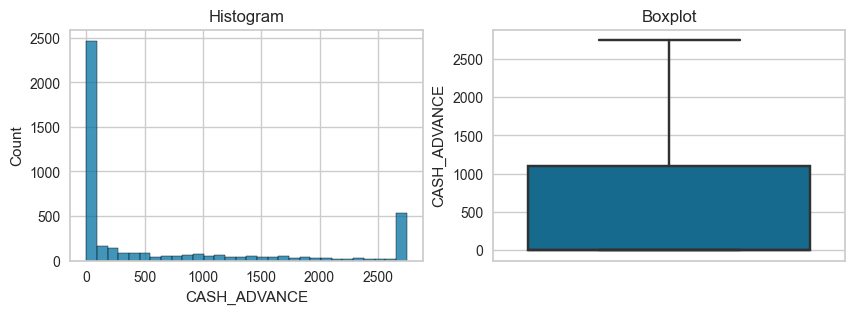

skewness: 1.264300755225504
the distribution is skewed


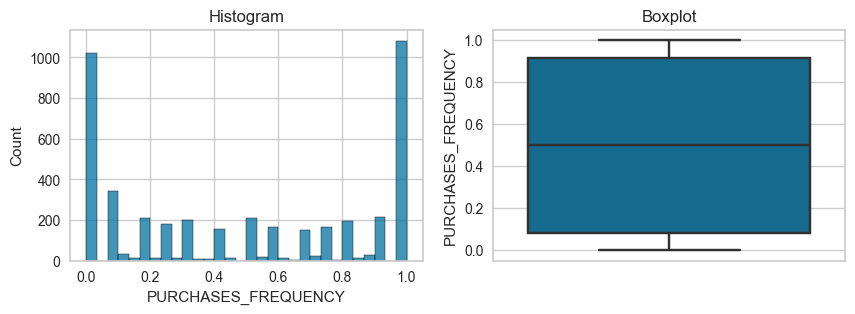

skewness: 0.06159754482450298
the distribution is normal


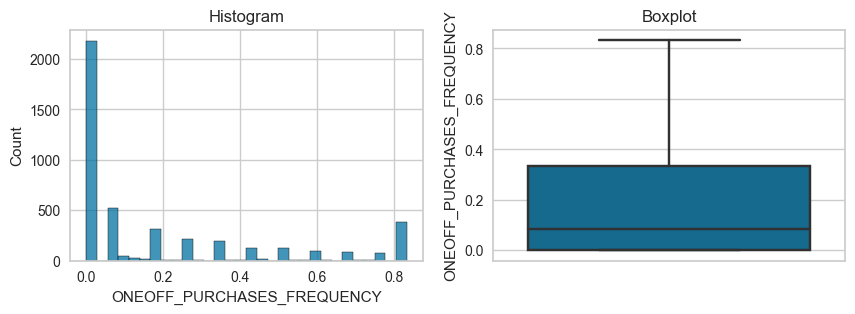

skewness: 1.3412151499200158
the distribution is skewed


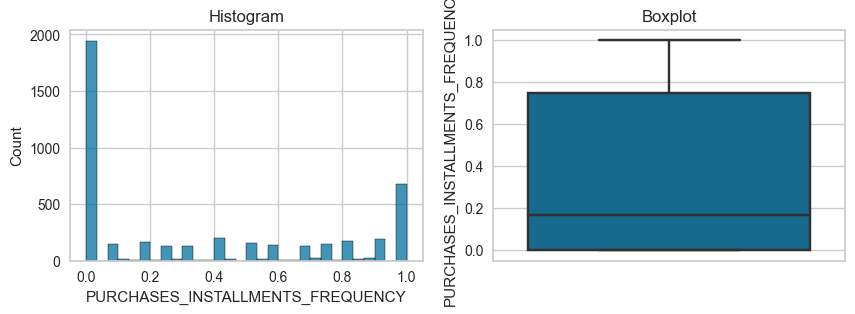

skewness: 0.5102876658863782
the distribution is skewed


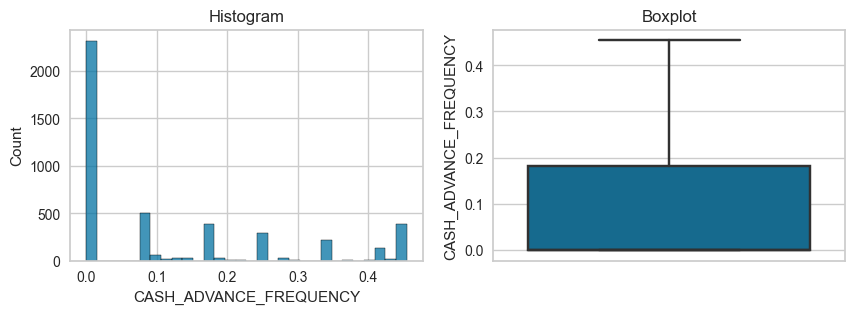

skewness: 1.077506221596407
the distribution is skewed


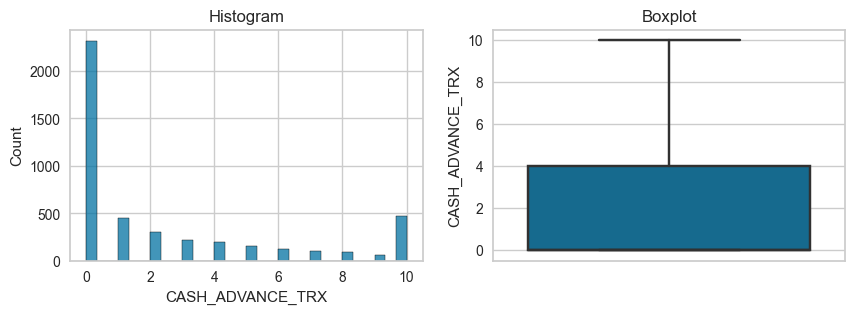

skewness: 1.2872746005964386
the distribution is skewed


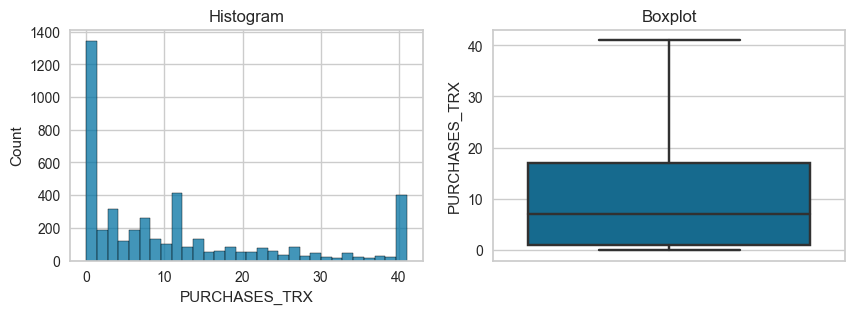

skewness: 1.1456681579218924
the distribution is skewed


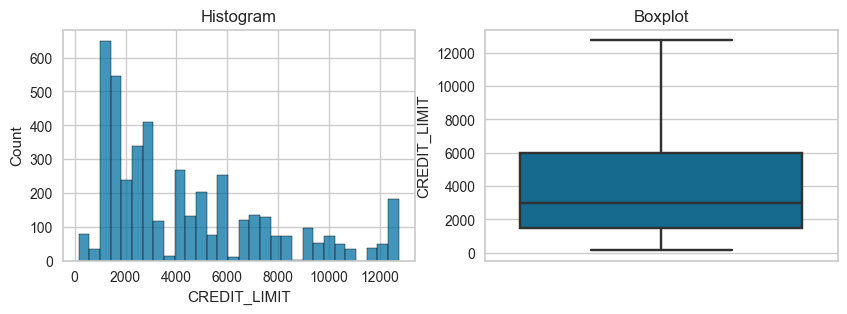

skewness: 1.0071527638070132
the distribution is skewed


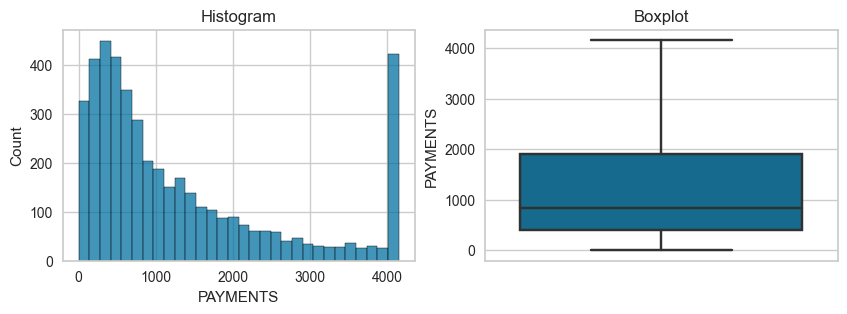

skewness: 1.1418651301663274
the distribution is skewed


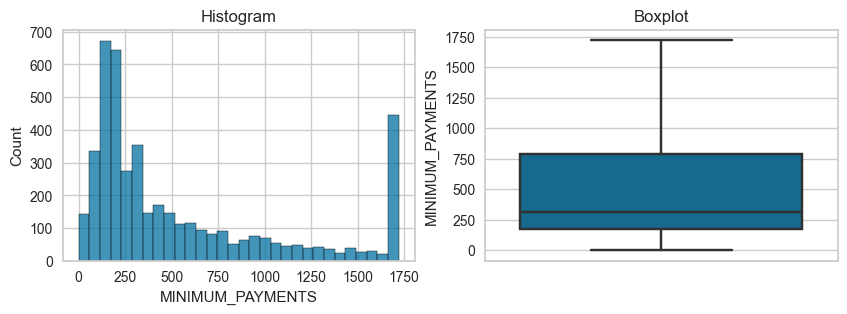

skewness: 1.1810660472473107
the distribution is skewed


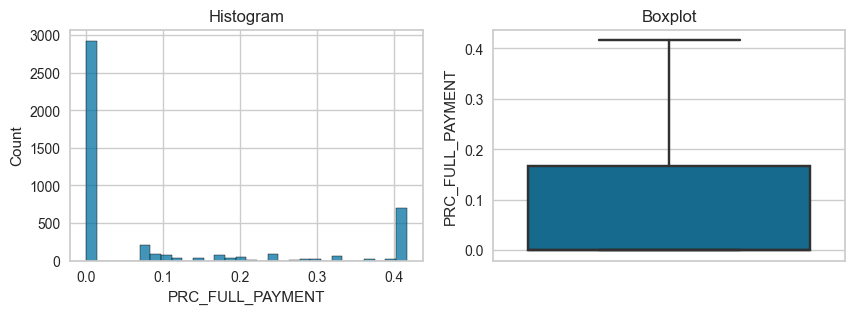

skewness: 1.2721768710035686
the distribution is skewed


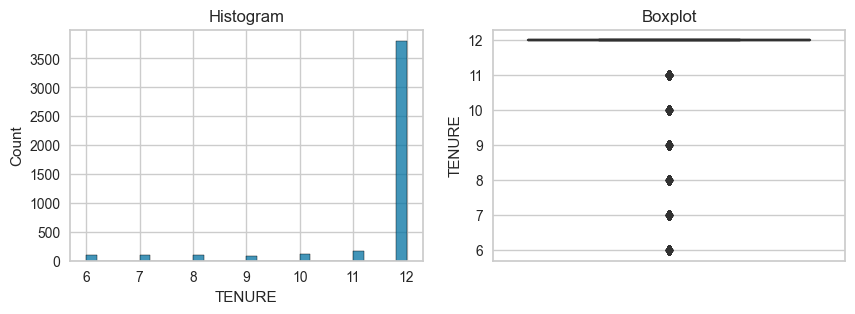

skewness: -2.9328221430257617
the distribution is skewed


In [21]:
# showing histogram dan boxplot setelah handling outlier
for i in df_handle:
    hist_boxplot(df_handle, i)

## 5.4 Feature Selection

In [22]:
# drop kolom CUST_ID
df_handle.drop(['CUST_ID'], axis=1, inplace=True)

statement : kolom `CUST_ID` di drop karena setiap customer id memiliki nilai yang berbeda-beda, apabila ada customer yang memiliki id tertentu maka tidak akan ada pengaruhnya. Oleh karena itu kolom `CUST_ID` ini akan di drop karena jika nilainya berbeda tidak akan berpengaruh.

## 5.5 Feature Scaling

karena mayoritas datanya berdistribusi skewed, maka saya akan menggunakan metode `MinMaxScaler` dalam menghandling feature scaling

In [23]:
# definisikan scaling
scaler = MinMaxScaler()

# fit dan transform data scaling
df_scaled = scaler.fit_transform(df_handle)

In [24]:
# Display data yang sudah scalin
data_scaled_df = pd.DataFrame(df_scaled, columns=df_handle.columns)
data_scaled_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.003352           0.125000   0.072820          0.000000   
1     0.190720           0.875000   0.037502          0.070995   
2     0.000400           0.125000   0.029128          0.055142   
3     0.093271           1.000000   0.212998          0.403226   
4     0.212955           1.000000   0.527944          0.999449   
...        ...                ...        ...               ...   
4470  0.218092           1.000000   0.000000          0.000000   
4471  0.163635           0.909091   0.000000          0.000000   
4472  0.684486           1.000000   0.204252          0.294472   
4473  0.978383           1.000000   0.581077          1.000000   
4474  0.399598           1.000000   0.375765          0.156396   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.165202      0.000000             0.125000   
1                   0.000000      0.000000             0.125000   
2                   0.000000      0.000000             0.125000   
3                   0.000000      0.000000             0.125000   
4                   0.000000      0.000000             0.125000   
...                      ...           ...                  ...   
4470                0.000000      0.458622             0.000000   
4471                0.000000      1.000000             0.000000   
4472                0.110487      0.731188             1.000000   
4473                0.000000      1.000000             0.454545   
4474                0.665055      1.000000             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.150000                          0.000000   
2                       0.150000                          0.000000   
3                       0.150000                          0.000000   
4                       0.150000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.872728                          0.363636   
4473                    0.545455                          0.000000   
4474                    0.109091                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                        0.0               0.0       0.048780      0.083333   
1                        0.0               0.0       0.024390      0.067460   
2                        0.0               0.0       0.024390      0.107143   
3                        0.0               0.0       0.024390      0.067460   
4                        0.0               0.0       0.024390      0.107143   
...                      ...               ...            ...           ...   
4470                     1.0               0.9       0.000000      0.083333   
4471                     1.0               0.7       0.000000      0.317460   
4472                     1.0               0.9       0.487805      0.789683   
4473                     1.0               1.0       0.609756      0.464286   
4474                     1.0               1.0       0.414634      0.305556   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0     0.000000          0.179927          0.000000  0.333333  
1     0.051828          0.238367          0.000000  0.333333  
2     0.000000          0.179927          0.000000  0.333333  
3     0.062108          0.088076          0.000000  0.333333  
4     0.095579          0.131892          0.000000  0.333333  
...        ...               ...               ...       ...  
4470  0.332075          0.157573          0.218181  0.833333  
4471  1.000000          0.140314          0.218181  0.833333  
4472  0.250085          0.514552          0.000000  

## 5.6 Check Multicollinearity

In [25]:
#Cek Multicollinearity
vif_data = pd.DataFrame()
vif_data["fitur"] = data_scaled_df.columns
  
# cari nilai VIF setiap fitur
vif_data["VIF"] = [variance_inflation_factor(data_scaled_df.values, i) for i in range(len(data_scaled_df.columns))]

# tampilkan tanel VIF
vif_data

fitur        VIF
0                            BALANCE   9.862085
1                  BALANCE_FREQUENCY  15.198632
2                          PURCHASES  27.486657
3                   ONEOFF_PURCHASES  15.611205
4             INSTALLMENTS_PURCHASES  11.470493
5                       CASH_ADVANCE   5.043165
6                PURCHASES_FREQUENCY  27.006604
7         ONEOFF_PURCHASES_FREQUENCY   9.921214
8   PURCHASES_INSTALLMENTS_FREQUENCY  22.398391
9             CASH_ADVANCE_FREQUENCY  12.566255
10                  CASH_ADVANCE_TRX  12.567703
11                     PURCHASES_TRX  11.290675
12                      CREDIT_LIMIT   4.824516
13                          PAYMENTS   4.395642
14                  MINIMUM_PAYMENTS   7.499460
15                  PRC_FULL_PAYMENT   2.124410
16                            TENURE  11.633621

statement : 
 - Dari nilai variance_inflation_factor dapat dilihat hanya fitur/kolom CREDIT_LIMIT, PAYMENTS dan PRC_FULL_PAYMENT yang memiliki nilai VIF dibawah dari 5. Artinya fitu-fitur tersebut tidak saling berkaitan. 

# 6 - Model Definition

In [26]:
# PCA
pca = PCA()

Untuk kasus clustering ini saya memilih untuk menggunakan 3 algortima yaitu KMeans, Agglomerative Clustering dan Spectral Clustering, namun sebelumnya kita harus menemukan jumlah cluster yang tepat menggunakan perhitungan inertia dan silhouette score.

In [27]:
# Clustering - KMeans
kmeans = KMeans(n_clusters=4, random_state=26)

In [28]:
# Clustering - Agglomerative
agglo = AgglomerativeClustering(n_clusters=4)


In [29]:
# Clustering - DBsc
spectral = SpectralClustering(n_clusters=4, random_state=26)

# 7 - Model Training

## 7.1 PCA

In [30]:
# Menentukan komponene PCA yang digunakan
pca.fit(df_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

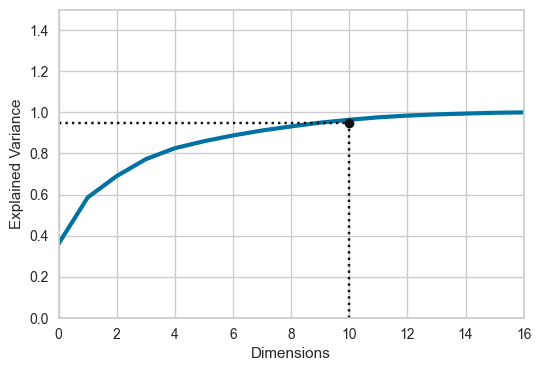

In [31]:
# Elbow Method 95%

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 16, 0, 1.5])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

statement : Setting untuk menentukan titik siku di komponen 95%. artinya kita menentukan informasi yang dibawa ada sekitar 95%

In [32]:
# Komponen dari 95%

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(df_scaled)
pca.n_components_

10

statement : feature berkurang karena yang dipakai 95%

In [33]:
# Jumlah EVR

np.sum(pca.explained_variance_ratio_)

0.9500589390904558

statement : presentase componen yang dihasilkan ada 95%

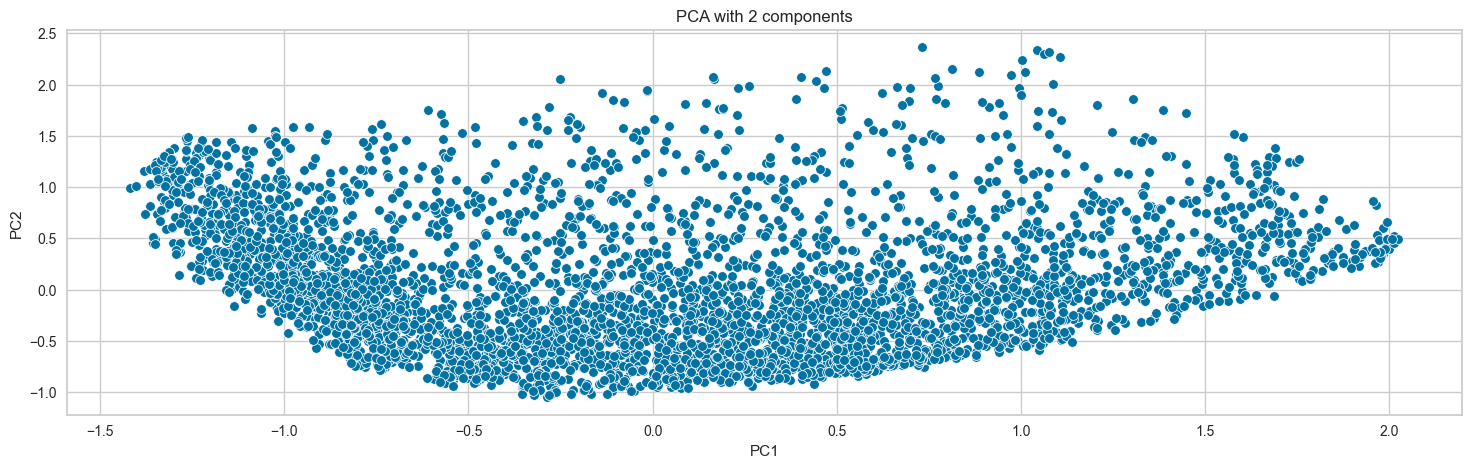

In [34]:
#  Visualisasi X ke dalam 2D

pca_2d = PCA(n_components=2, random_state=26)
X_2d  = pca_2d.fit_transform(df_scaled)

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

## 7.2 Kmeans Model

In [35]:
# Menentukan nilai K
kmeans_per_k = [KMeans(n_clusters=k, random_state=26).fit(df_scaled)
                for k in range(1, 9)]


Elbow Method


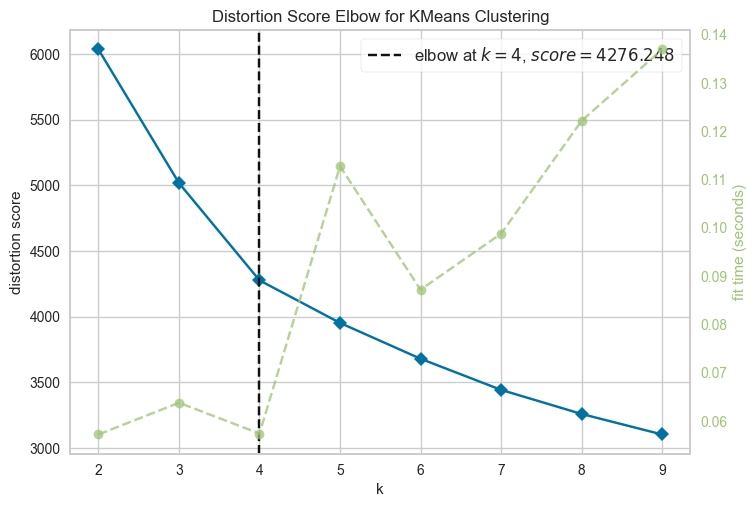

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# print elbow graph for k

print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(df_scaled)
Elbow_M.show()

statement : Pada grafik Kmeans menunjukkan bahwa potongan (k) berada di angka 4 dengan score 4276.248

In [37]:
# menentukan k menggunakan inertias

k=[2,3,4,5,6,7,8,9]
kmeans_per_k = [KMeans(n_clusters=k, random_state=26).fit(df_scaled)
                for k in range(1, 9)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [38]:
# Membuat silhouette_scores

silhouette_scores = [silhouette_score(df_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

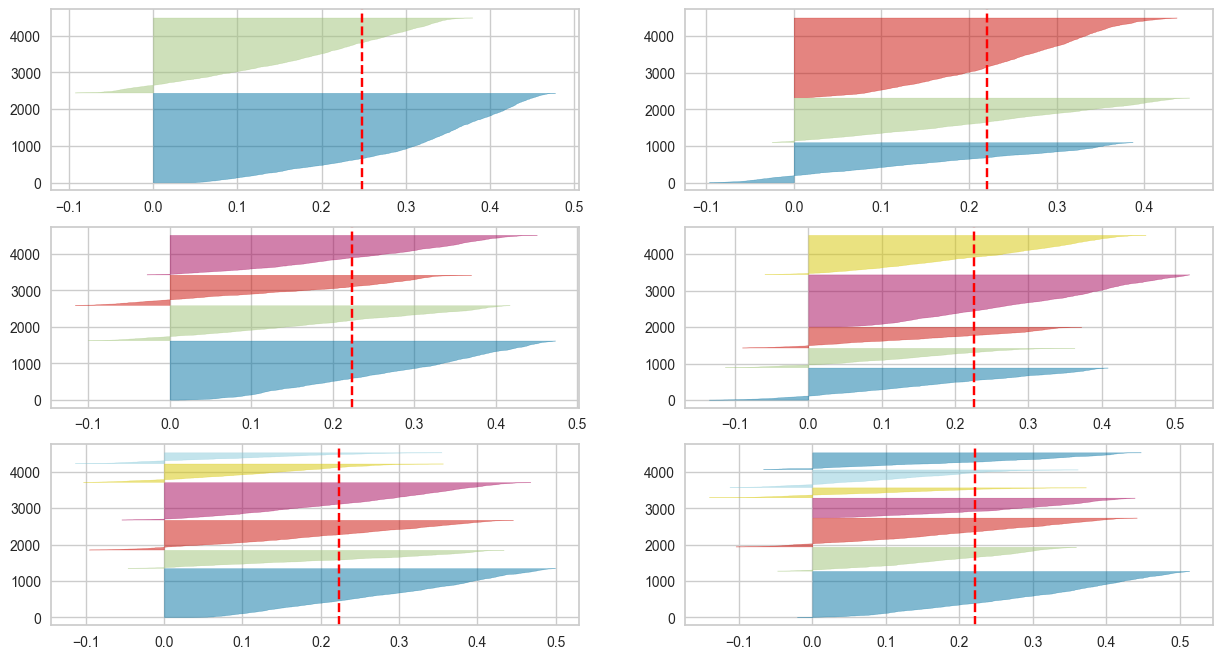

In [39]:
# Membuat plot silhouette_scores

fig, ax = plt.subplots(3, 2, figsize = (15,8))

for i in np.arange(2,8):
  km_shilloutte = KMeans(n_clusters = i, init="k-means++", n_init = 10, max_iter = 300, random_state = 26)
  q, mod = divmod(i,2)

  visualizer = SilhouetteVisualizer(km_shilloutte, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(df_scaled)

Statement : Untuk silhouette_scores kita memilih k = 4 karena terlihat lebih balance

In [40]:
# Fit menggunakan data Scaled
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=26)

## 7.3 Agglomerative Model

Elbow Method


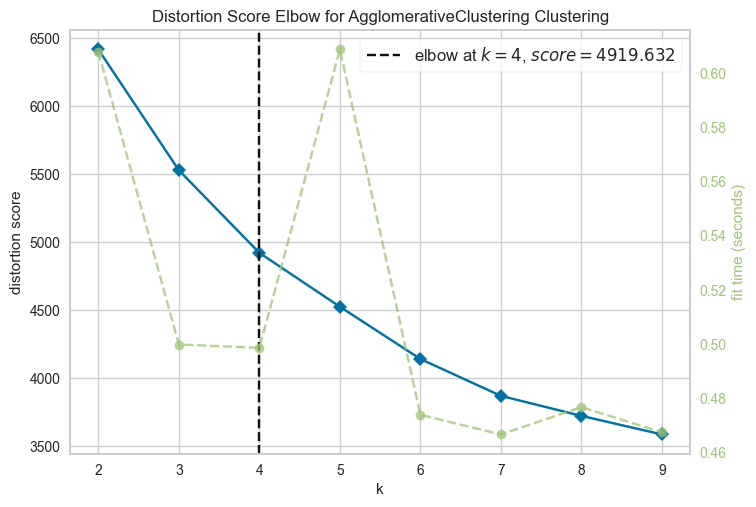

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# print elbow graph for Agglomerative

print('Elbow Method')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=9)
Elbow_M.fit(df_scaled)
Elbow_M.show()

Pada grafik Agglomerative menunjukkan bahwa potongan (k) berada di angka 4 dengan score 4919.632

In [42]:
k=[2,3,4,5,6,7,8,9]
agglo_per_k = [AgglomerativeClustering(n_clusters=k).fit(df_scaled)
                for k in range(1, 9)]

In [43]:
# Membuat silhouette_scores

silhouette_scores = [silhouette_score(df_scaled, model.labels_)
                     for model in agglo_per_k[1:]]

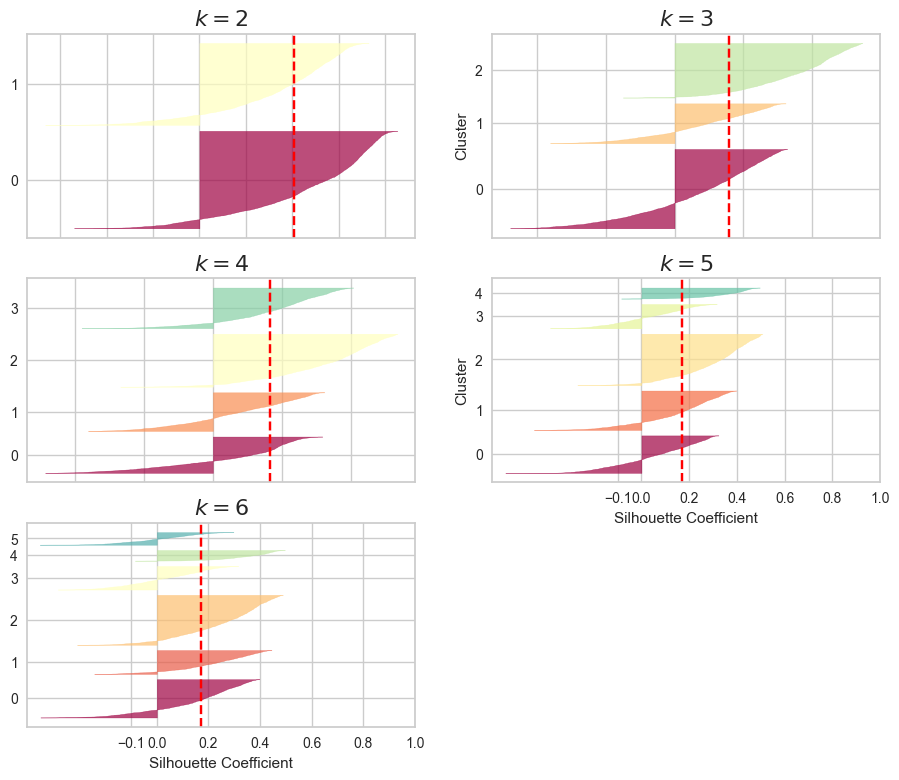

In [44]:
# Membuat plot silhouette_scores

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = agglo_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df_scaled, y_pred)

    padding = len(df_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Statement : Untuk silhouette_scores Agglomerative Clustering kita memilih k = 4 karena terlihat lebih balance

In [45]:
# Fit menggunakan data scaled
agglo.fit(df_scaled)

AgglomerativeClustering(n_clusters=4)

## 7.4 Spectral Model

In [46]:
# Menentukan nilai K
spectral_per_k = [SpectralClustering(n_clusters=k, random_state=26).fit(df_scaled)
                for k in range(1, 9)]

Elbow Method


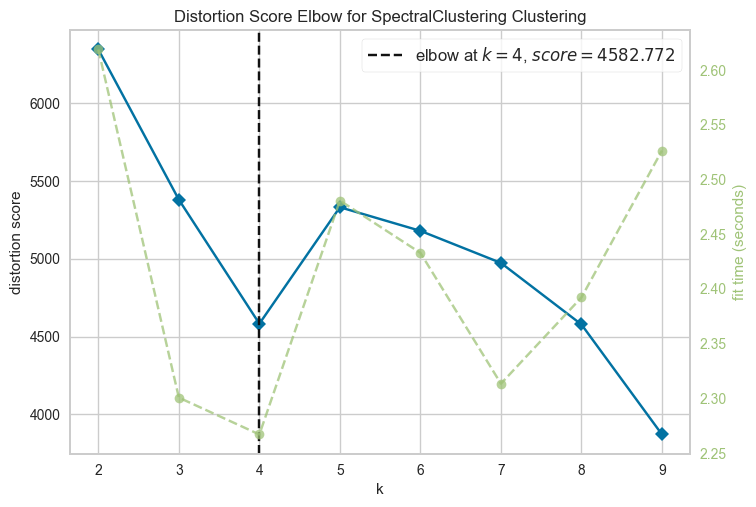

<AxesSubplot: title={'center': 'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# print elbow graph for k

print('Elbow Method')
Elbow_M = KElbowVisualizer(SpectralClustering(), k=9)
Elbow_M.fit(df_scaled)
Elbow_M.show()

Statement : Pada grafik Spectral menunjukkan bahwa potongan (k) berada di angka 4, dengan score 4582.772

In [48]:
# Membuat silhouette_scores

silhouette_scores = [silhouette_score(df_scaled, model.labels_)
                     for model in spectral_per_k[1:]]

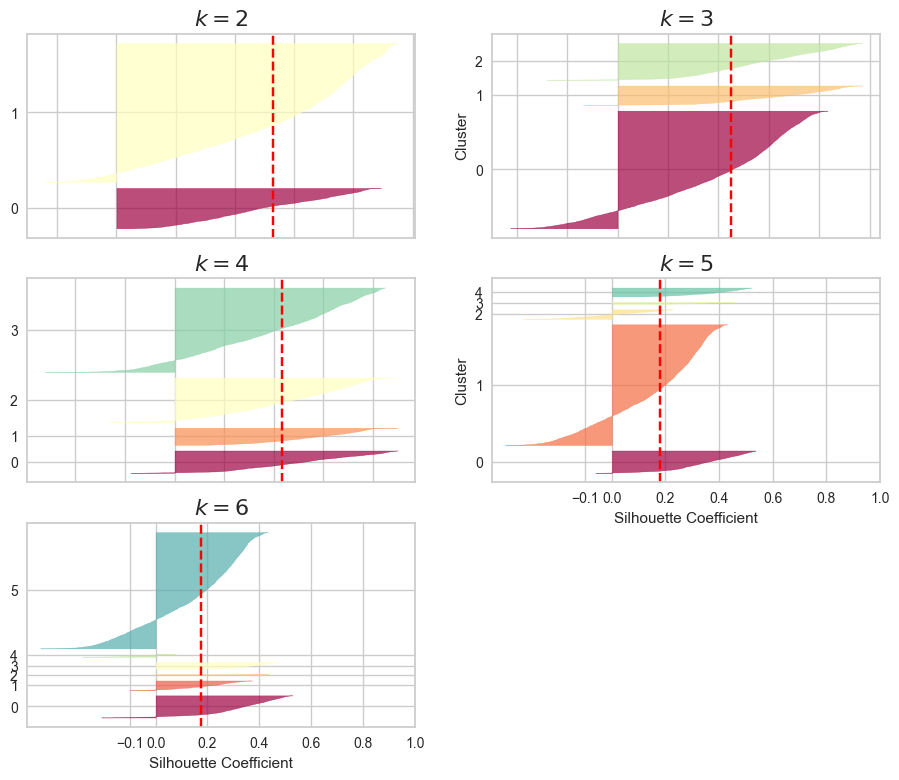

In [49]:
# Membuat plot silhouette_scores

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = spectral_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df_scaled, y_pred)

    padding = len(df_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Statement : Untuk silhouette_scores Spectral Clustering kita memilih k = 4 karena terlihat lebih balance

In [50]:
# Fit menggunakan data scaled
spectral.fit(df_scaled)

SpectralClustering(n_clusters=4, random_state=26)

# 8 - Model Evaluation

## 8.1 Model Evaluasi Kmeans

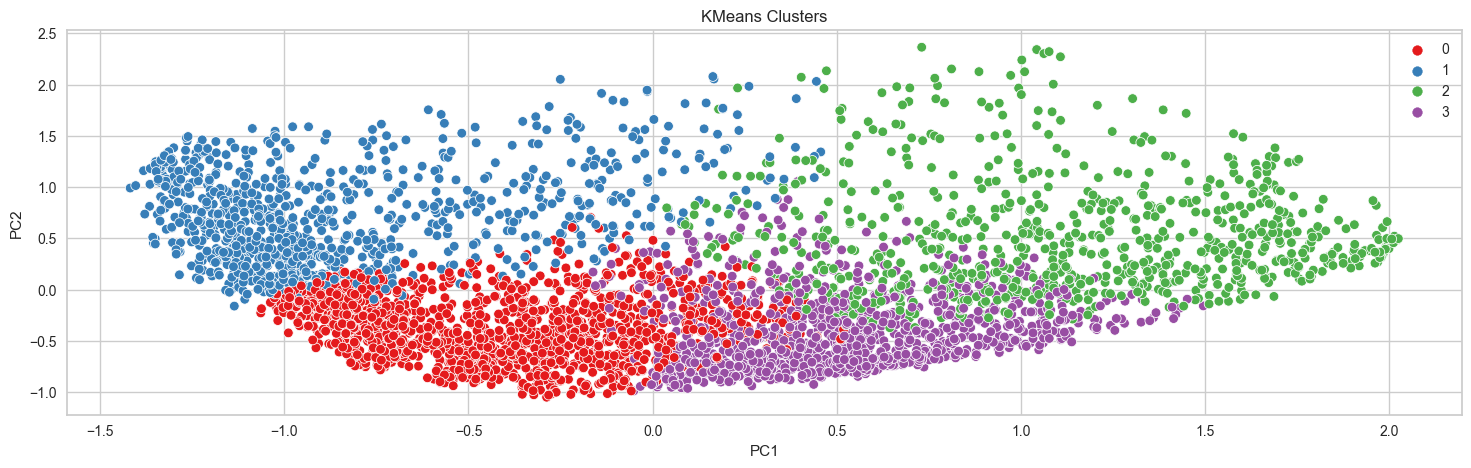

In [51]:
# Berikut merupakan clustering dari Kmeans

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

statement : berikut merupakan hasil distribusi dari Kmeans

In [52]:
# Hasil clustering dengan kmeans

X_cluster1 = df.copy()
X_cluster1['cluster'] = kmeans.labels_
X_cluster1.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535              0.125      200.0               0.0   
1     1902   943.584041              0.875      103.0             103.0   
2     2322     1.979916              0.125       80.0              80.0   
3     3426   461.455720              1.000      585.0             585.0   
4     3976  1053.594730              1.000     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0    0.000000        309.854995               0.0       8        0  
1  215.325023        410.484825               0.0       8        0  
2    0.000000        309.854995               0.0       8        0  
3  258.032630        151.696433               0.0       8        0  
4  397.090516        227.143184               0.0       8        0

In [53]:
# melihat jumlah persebaran data
X_cluster1.groupby('cluster')['CUST_ID'].count()

cluster
0    1617
1     954
2     824
3    1080
Name: CUST_ID, dtype: int64

### EDA untuk Kmeans

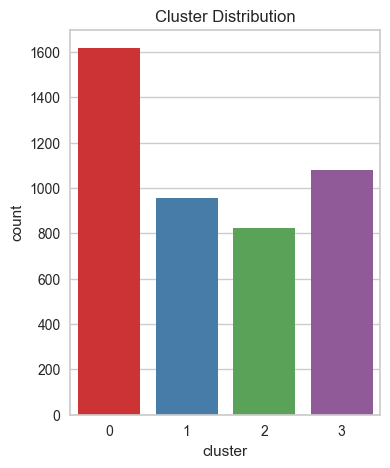

In [54]:
# menampilkan plot distribusi dari clustering

plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster1, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

statement : Dataframe diatas merupakan hasil dari pengclusteran di Kmeans, dimana dari persebaran data yang paling banyak yaitu di cluster 0 dengan total 1617, sedangkan persebaran yang paling sedikit yaitu pada cluster 2 dengan total 824

## 8.2 Model Evaluasi Agglomerative

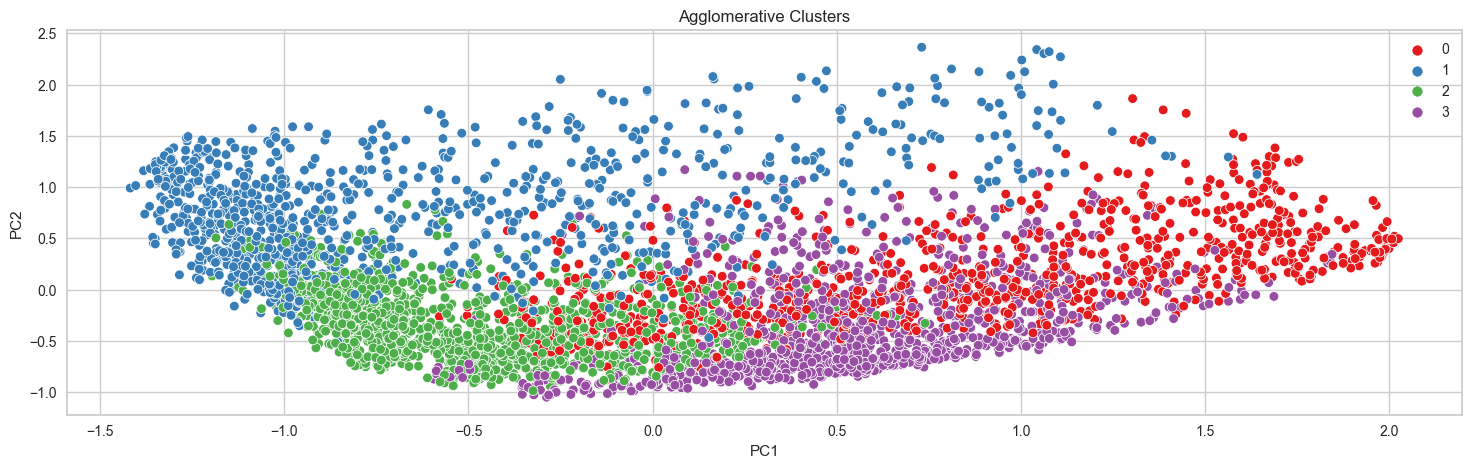

In [55]:
# Berikut merupakan clustering dari Agglomerative

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=agglo.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clusters')
plt.show()

statement : berikut merupakan hasil distribusi dari Agglomerative Clustering

In [56]:
# Hasil clustering dengan Agglomerative

X_cluster2 = df.copy()
X_cluster2['cluster'] = agglo.labels_
X_cluster2.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535              0.125      200.0               0.0   
1     1902   943.584041              0.875      103.0             103.0   
2     2322     1.979916              0.125       80.0              80.0   
3     3426   461.455720              1.000      585.0             585.0   
4     3976  1053.594730              1.000     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0    0.000000        309.854995               0.0       8        2  
1  215.325023        410.484825               0.0       8        2  
2    0.000000        309.854995               0.0       8        2  
3  258.032630        151.696433               0.0       8        0  
4  397.090516        227.143184               0.0       8        0

In [57]:
# melihat jumlah persebaran data
X_cluster2.groupby('cluster')['CUST_ID'].count()

cluster
0     965
1    1026
2    1406
3    1078
Name: CUST_ID, dtype: int64

statement : Dataframe diatas merupakan hasil dari pengclusteran di Agglomerative Clustering, dimana dari persebaran data yang paling banyak yaitu di cluster 2 dengan total 1406, sedangkan paling rendah berada pada cluster 0 dengan total 965

### EDA untuk Agglomerative

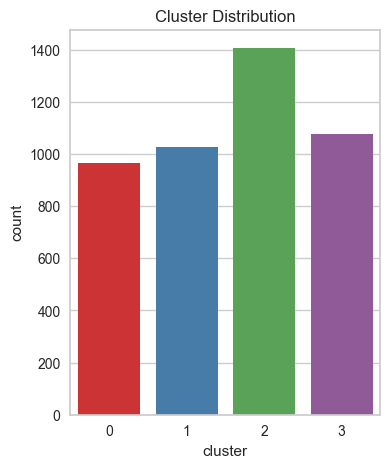

In [58]:
# menampilkan plot distribusi dari clustering

plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster2, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

statement : untuk hasil dari agglo, cluster tertinggi ada di cluster 2

## 8.3 Model Evaluasi Spectral

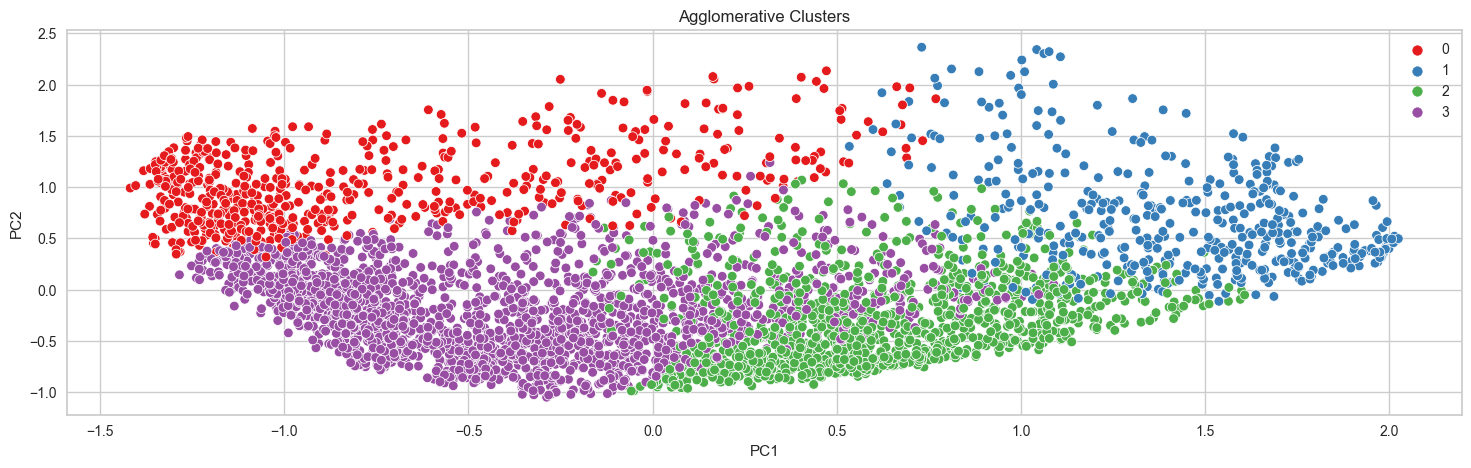

In [59]:
# Berikut merupakan clustering dari Spectral

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=spectral.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clusters')
plt.show()


berikut merupakan hasil persebaran data untuk Sprectral Cluster

In [60]:
# Hasil Clustering dengan Spectral

X_cluster3 = df.copy()
X_cluster3['cluster'] = spectral.labels_
X_cluster3.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535              0.125      200.0               0.0   
1     1902   943.584041              0.875      103.0             103.0   
2     2322     1.979916              0.125       80.0              80.0   
3     3426   461.455720              1.000      585.0             585.0   
4     3976  1053.594730              1.000     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0    0.000000        309.854995               0.0       8        3  
1  215.325023        410.484825               0.0       8        3  
2    0.000000        309.854995               0.0       8        3  
3  258.032630        151.696433               0.0       8        3  
4  397.090516        227.143184               0.0       8        3

In [61]:
# melihat jumlah persebaran data
X_cluster3.groupby('cluster')['CUST_ID'].count()

cluster
0     595
1     455
2    1184
3    2241
Name: CUST_ID, dtype: int64

statement : Dataframe diatas merupakan hasil dari pengclusteran di Spectral Clustering, dimana dari persebaran data yang paling banyak yaitu di cluster 3 dengan total 2241, dan untuk data terendah berada pada cluster 1 dengan total 455 data.

### EDA Spectral

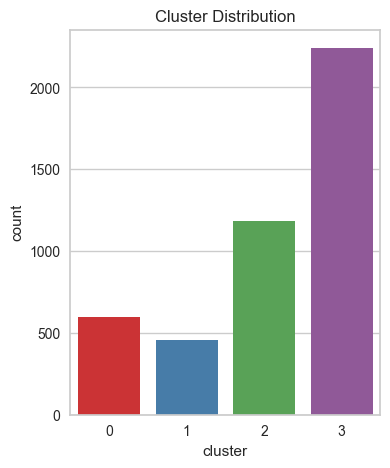

In [62]:
# menampilkan plot distribusi dari clustering
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster3, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

cluster terbanyak pada kategori 3, dan terendah pada cluster 1

## 8.4 Perbandingan Data

In [72]:
data_compare = pd.DataFrame({'Model' : ['K-Means', 'Agglomerative', 'Spectral'],
              'N Cluster' : [4, 4, 4], 'Silhouette Score' : [4276.248, 4919.632, 4582.772]})

data_compare

Model  N Cluster  Silhouette Score
0        K-Means          4          4276.248
1  Agglomerative          4          4919.632
2       Spectral          4          4582.772

Statement : Dataset diatas menunjukkan bahwa score tertinggi ada di agglomerative dengan n cluster : 4 dan score 4919.632, sehingga untuk data test dipilih model agglomerative clustering.

# 9 - Model Inference

In [64]:
# melihat data inference

df_inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      7092   312.636004           1.000000    3866.29            808.12   
1       112   360.671491           1.000000    3956.64              0.00   
2       846    30.692503           0.454545     205.06              0.00   
3      8312  2817.590920           1.000000      37.92              0.00   
4      4176  7803.071972           1.000000    1000.55              0.00   
5      4466    64.907748           0.727273     547.28            130.00   
6      3568  1362.418281           1.000000    1477.44            900.00   
7      5736   284.433780           0.363636     212.92              0.00   
8       404  8040.732429           1.000000       0.00              0.00   
9      3912   772.647723           0.875000       0.00              0.00   
10     3744   561.157673           1.000000       0.00              0.00   
11     6928  2933.577644           1.000000    4562.57           3729.83   
12     3958  4433.582508           1.000000       0.00              0.00   
13     6320    10.564262           0.545455     240.25            240.25   
14     2744  2762.479434           1.000000    2702.47           1526.31   
15      520   939.348677           1.000000      50.00             50.00   
16     5622   195.575108           1.000000    2984.34           2754.92   
17     2658  4064.615698           1.000000     351.00              0.00   
18     7616   132.993735           0.454545    1383.67           1358.77   
19     8324  4530.205197           1.000000    1750.66            643.18   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  3058.17      0.000000             1.000000   
1                  3956.64    148.682192             1.000000   
2                   607.76      0.000000             0.916667   
3                    37.92      0.000000             0.166667   
4                  1000.55   1490.239239             1.000000   
5                   417.28      0.000000             0.333333   
6                   577.44    451.968387             1.000000   
7                   212.92      0.000000             0.833333   
8                     0.00   3500.334072             0.000000   
9                     0.00    970.371120             0.000000   
10                    0.00    244.504364             0.000000   
11                  832.74      0.000000             1.000000   
12                    0.00   1434.153185             0.000000   
13                    0.00      0.000000             0.500000   
14                 1176.16      0.000000             1.000000   
15                    0.00      0.000000             0.083333   
16                  229.42      0.000000             1.000000   
17                  351.00   2412.042200             0.750000   
18                   24.90      0.000000             0.416667   
19                 1107.48  26268.699890             1.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     1.000000                          1.000000   
1                     0.000000                          1.000000   
2                     0.000000                          1.000000   
3                     0.000000                          0.166667   
4                     0.000000                          1.000000   
5                     0.083333                          0.250000   
6                     0.111111                          0.888889   
7                     0.000000                          0.833333   
8                     0.000000                          0.000000   
9                     0.000000                          0.000000   
10                    0.000000                          0.000000   
11                    0.750000                          0.916667   
12                    0.000000                          0.000000   
13                    0.500000                          0.000000   
14                   

data inference terdiri dari 20 rows

In [65]:
# Select data into X
X_inf = np.array(df_inf)
X_inf

array([[7.09200000e+03, 3.12636004e+02, 1.00000000e+00, 3.86629000e+03,
        8.08120000e+02, 3.05817000e+03, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+01, 7.50000000e+03, 3.68889080e+03, 1.90886140e+02,
        7.50000000e-01, 1.20000000e+01],
       [1.12000000e+02, 3.60671491e+02, 1.00000000e+00, 3.95664000e+03,
        0.00000000e+00, 3.95664000e+03, 1.48682192e+02, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 8.33330000e-02, 1.00000000e+00,
        1.20000000e+01, 4.50000000e+03, 4.01348311e+03, 3.66223605e+03,
        2.50000000e-01, 1.20000000e+01],
       [8.46000000e+02, 3.06925030e+01, 4.54545000e-01, 2.05060000e+02,
        0.00000000e+00, 6.07760000e+02, 0.00000000e+00, 9.16667000e-01,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.50000000e+01, 4.50000000e+03, 1.63982192e+02, 5.56609810e+01,
        0.00000000e+00, 1.20000000e+01],
       [8.312

In [66]:
# Feature Scaling
data_inf_final = scaler.fit_transform(X_inf)
data_inf_final


array([[0.84997565, 0.03761711, 1.        , 0.84739303, 0.21666403,
        0.77292096, 0.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.48148148, 0.14207757,
        0.03749406, 0.75      , 1.        ],
       [0.        , 0.04359899, 1.        , 0.86719546, 0.        ,
        1.        , 0.00566005, 1.        , 0.        , 1.        ,
        0.14285665, 0.04761905, 0.12631579, 0.25925926, 0.15502086,
        1.        , 0.25      , 1.        ],
       [0.08938139, 0.00250658, 0.14285692, 0.04494397, 0.        ,
        0.15360508, 0.        , 0.916667  , 0.        , 1.        ,
        0.        , 0.        , 0.36842105, 0.25925926, 0.00152006,
        0.        , 0.        , 1.        ],
       [0.99853872, 0.34956013, 1.        , 0.00831111, 0.        ,
        0.00958389, 0.        , 0.166667  , 0.        , 0.166667  ,
        0.        , 0.        , 0.02105263, 0.14814815, 0.02509969,
        0.3082302 , 0.        , 1.        ],
    

In [67]:
# Fit terhadap Scaled
agglo.fit(data_inf_final)

AgglomerativeClustering(n_clusters=4)

In [68]:
# Hasil clustering dari Agglomerative
X_cluster_Inf = df_inf.copy()
X_cluster_Inf['cluster'] = agglo.labels_
X_cluster_Inf.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     7092   312.636004           1.000000    3866.29            808.12   
1      112   360.671491           1.000000    3956.64              0.00   
2      846    30.692503           0.454545     205.06              0.00   
3     8312  2817.590920           1.000000      37.92              0.00   
4     4176  7803.071972           1.000000    1000.55              0.00   
5     4466    64.907748           0.727273     547.28            130.00   
6     3568  1362.418281           1.000000    1477.44            900.00   
7     5736   284.433780           0.363636     212.92              0.00   
8      404  8040.732429           1.000000       0.00              0.00   
9     3912   772.647723           0.875000       0.00              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 3058.17      0.000000             1.000000   
1                 3956.64    148.682192             1.000000   
2                  607.76      0.000000             0.916667   
3                   37.92      0.000000             0.166667   
4                 1000.55   1490.239239             1.000000   
5                  417.28      0.000000             0.333333   
6                  577.44    451.968387             1.000000   
7                  212.92      0.000000             0.833333   
8                    0.00   3500.334072             0.000000   
9                    0.00    970.371120             0.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    1.000000                          1.000000   
1                    0.000000                          1.000000   
2                    0.000000                          1.000000   
3                    0.000000                          0.166667   
4                    0.000000                          1.000000   
5                    0.083333                          0.250000   
6                    0.111111                          0.888889   
7                    0.000000                          0.833333   
8                    0.000000                          0.000000   
9                    0.000000                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0             95        7500.0   
1                0.083333                 1             12        4500.0   
2                0.000000                 0             35        4500.0   
3                0.000000                 0              2        3000.0   
4                0.333333                 6             35        8000.0   
5                0.000000                 0              4        2500.0   
6                0.111111                 1             10        1500.0   
7                0.000000                 0             15        1500.0   
8                0.333333                21              0       12000.0   
9                0.125000                 1              0        2500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0  3688.890803        190.886140              0.75      12        3  
1  4013.483114       3662.236048              0.25      12        0  
2   163.982192         55.660981              0.00      12        2  
3   755.313452       1167.316335              0.00      12        1  
4  3478.320794       2722.218432              0.00      12        0  
5  1095.179494        126.509061              1.00      12        2  
6   559.095981       1058.844790              0.00       9        0  
7  1202.791804        150.107024              0.00      12        2  
8  2709.478892       2044.554634              0.00      12        1  
9   125.862157        209.002905              0.00       8        1

In [69]:
# melihat jumlah persebaran data
X_cluster_Inf.groupby('cluster')['CUST_ID'].count()

cluster
0    6
1    6
2    5
3    3
Name: CUST_ID, dtype: int64

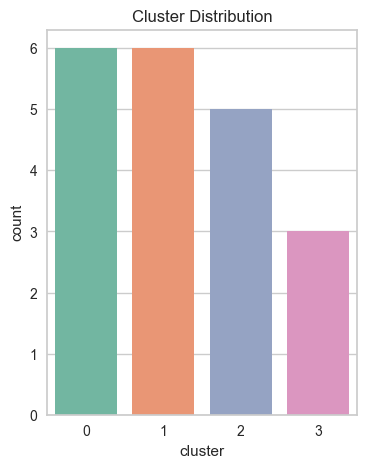

In [70]:
# membuat plot distribusi cluster data inference
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster_Inf, x='cluster', palette='Set2')
plt.title('Cluster Distribution')
plt.show()

statement : hasil dari pengclusteran di Agglomerative Clustering pada data inference, dimana dari persebaran data yang paling banyak terdapat pada cluster 0 dan 1, keduanya memiliki nilai yang sama yaitu 6. Dan data terendah pada cluster 3 dengan total data 3

In [71]:
# membuat tabel rata-rata dari setiap fitur pada cluster
df_inf['cluster_inf'] = agglo.labels_
df_inf.groupby('cluster_inf').mean()

CUST_ID      BALANCE  BALANCE_FREQUENCY    PURCHASES  \
cluster_inf                                                             
0            3597.000000  3480.577012           1.000000  1873.126667   
1            3475.000000  2927.509988           0.979167    14.653333   
2            4996.800000   104.718406           0.509091   517.836000   
3            6547.333333  1147.262919           1.000000  3804.400000   

             ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
cluster_inf                                                           
0                  511.581667             1361.545000   5128.605318   
1                    8.333333                6.320000   1024.893790   
2                  345.804000              252.572000      0.000000   
3                 2430.956667             1373.443333      0.000000   

             PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
cluster_inf                                                    
0                       0.958333                    0.115741   
1                       0.041667                    0.013889   
2                       0.600000                    0.183333   
3                       1.000000                    0.916667   

             PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
cluster_inf                                                             
0                                    0.925926                0.199074   
1                                    0.027778                0.173611   
2                                    0.450000                0.000000   
3                                    0.777778                0.000000   

             CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
cluster_inf                                                               
0                    3.500000      21.500000   6416.666667  6925.749332   
1                    5.833333       0.500000   4250.000000  1860.774815   
2                    0.000000      14.400000   3640.000000   840.506073   
3                    0.000000      70.333333   8666.666667  3270.730200   

             MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
cluster_inf                                                 
0                 2073.079602          0.097222  11.500000  
1                  920.794804          0.013889  11.333333  
2                  109.275330          0.400000  12.000000  
3                  471.115765          0.583333  12.000000

# 10 - Analysis

## 10.1 Overall Analysis

Dataset `credit card information` terdiri dari 4475 baris dan 18 kolom. Seluruh kolom bertipe Numeric. Dengan beberapa penjelasan values pada kolomnya yaitu : 
1. Balance merupakan saldo yang dimiliki oleh para users, yang mana rata-rata saldo dari 4475 user mempunyai saldo $1565 dengan saldo tertinggi $19043.
2. Balance frequency disini berisikan frekuensi user topup saldo pada akun mereka. disini untuk rata-ratanya yaitu  0.877.
3. Purchase atau pembelian yang dilakukan rata-rata dari seluruh user ada 1.003 kali, dengan pembelian paling banyak yaitu sebanyak 49.039 kali. 
4. Oneoff purchase, Jumlah (dollar) dalam sekali pembelian, pembelian tertinggi dalam sekali pembelian yaitu $40761
5. Installment purchase merupakan pembelian yang dilakuakan dengan metode cicilan, rata-rata user yang menggunakan credit card untuk belanja yaitu $415.
6. cash_advance merupakan pembayaran cash oleh user kepada bank, rata-rata pembayaran ada di angka $ 973,45, pembayaran ini lebih besar dibandingkan dengn rata-rata pinjamannya.


Dari data di atas saya melakukan clustering menggunakan 3 model yaitu Kmeans, agglomerative clustering dan spectral clustering yang dimana sebelumnya akan dilakukan dulu pengurangan dimensi (PCA) untuk mempermudah clustering. Dari 17 kolom bisa mereduksi menjadi hanya 10 kolom saja menggunakan PCA dan tetap mempertahankan 95% kualitas data.

kemudian saya melakukan clustering menggunakan 3 model clustering dengan jumlah cluster 4 dimana jumlah tersebut diperoleh dari hasil inertia dan silhouette score. Secara sekilas kita bisa melihat bahwa hasil clustering antar model kita cukup baik namun model Agglomerative memperoleh hasil paling baik diantara 3 model karena memiliki Silhouette Score yang paling bagus.

Setelah itu, saya melakukan inferencing menggunakan metode model Agglomerative Clustering dan mendapatkan hasil sebagai berikut : 
1. cluster 0 : 
    - balance : jumlah rata-rata saldo pada cluster 0 merupakan yang tertinggi diantara yang lainnya
    - purchase : jumlah rata-rata pembelian yang dilakukan cluster 0 berada pada peringkat kedua
    - Installment purchase : jumlah rata-rata pembelian yang dilakukan menggunakan metode cicilan pada cluster 0 berada pada peringkat kedua, namun hanya memiliki selisih yang sedikit dengan peringkat pertama
    - cash_advance : jumlah rata-rata pembayaran cash yang dilakukan pelanggan cluster 0 ini menjadi yang tertinggi.
    - kesimpulan cluster 0 : dengan memiliki jumlah saldo yang banyak, minat belanja pada cluster ini masih tergolong tinggi, namun rata-rata pembayaran cash lebih banyak daripada jumlah rata-rata pelanggan yang menggunakan metode cicilan.    
2. cluster 1 : 
    - balance : jumlah rata-rata saldo pada cluster 1 berada pada peringkat kedua
    - purchase : tingkat rata-rata pembelian yang dilakukan pada cluster 1 sangat rendah
    - Installment purchase : jumlah rata-rata pembelian yang dilakukan menggunakan metode cicilan pada cluster 1 berada di peringkat terakhir, dan tergolong rendah
    - cash_advance : walaupun minat belanja sedikit, tetapi jumlah rata-rata pembayaran cash yang dilakukan berada pada peringkat kedua.
    - kesimpulan cluster 1 : walaupun memiliki jumlah saldo yang banyak, namun minat belanja cluster 1 rendah, mayoritas mereka melakukan pembayaran menggunakan cash.
3. cluster 2 : 
    - balance : tergolong paling rendah
    - purchase : tingkat rata-rata pembelian yang dilakukan pada cluster 2 berada pada peringkat kedua dari bawah
    - Installment purchase : jumlah rata-rata pembelian yang dilakukan menggunakan metode cicilan pada cluster 2 berada pada peringkat kedua dari bawah, dan tergolong rendah
    - cash_advance : tidak ada cash in advance
    - kesimpulan cluster 2 : meskipun jumlah saldo yang dimiliki berada pada urutan terakhir, namun hal tersebut tidak menutup minat berbelanja, secara keseluruhan cluster ini menggunakan metode pembayaran cicilan semua, tidak ada yang melakukan pembayaran dengan cash.
4. cluster 3 : 
    - balance : pada cluster 3 berada pada peringkat kedua dari bawah
    - purchase :  tingkat rata-rata pembelian yang dilakukan pada cluster 3 merupakan yang paling tinggi diantara yang lainnya
    - Installment purchase : rata-rata pembelian yang dilakukan dengan menggunakan metode cicilan pada cluster 3 merupakan yang paling tinggi diantara yang lainnya
    - cash_advance : tidak ada cash in advance
    - kesimpulan cluster 3 : walaupun rata-rata jumlah saldo yang dimiliki berada pada peringkat kedua terendah tapi sifat karakteristik pada cluster 3 memiliki sifat konsumtif, karena jumlah pembelian yang dilakukan merupakan yang paling banyak diantara yang lainnya, secara keseluruhan cluster 3 ini menggunakan metode pembayaran cicilan semua, tidak ada yang melakukan pembayaran dengan cash.

# Conceptual Problem

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
    
    Inersia merupakan pengukuran seberapa baik kumpulan data dikelompokkan oleh K-Means. Perhitungannya dengan mengukur jarak antara setiap titik data dan pusat massanya (mengkuadratkan jarak ini, dan menjumlahkan kuadrat ini di satu cluster).

    Model yang baik adalah model yang memiliki inersia yang rendah dan jumlah cluster (K) yang rendah. Namun, ini merupakan tradeoff karena K meningkat, inersia menurun.

    Untuk mencari K optimal gunakan metode Elbow, dengan cara menemukan titik dimana penurunan inersia mulai melambat.

    Surce : `https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet`

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

    Metode Elbow merupakan suatu metode yang digunakan untuk menghasilkan informasi dalam menentukan jumlah cluseter terbaik dengan cara melihat persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik. Pada metode elbow nilai cluster terbaik yang akan diambil dari nilai Sum of Square Error (SSE) yang mengalami penurunan yang signifikan dan berbentuk siku.

    Alasan menggunakan Elbow Method karena grafiknya include dengan score. Kelebihannya yaitu hasil atau siku pada titik tidak menentukan secara visual, sedangkan kekurangannya yaitu jika disandingkan dengan shilutte terkadang distribusi datanya tidak bagus.   

    Source : `https://jurnal.uns.ac.id/itsmart/article/viewFile/11296/11108#:~:text=Metode%20Elbow%20merupakan%20suatu%20metode,pada%20suatu%20titik%20%5B4%5D.`

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

- Kmeans : Pengelompokan K-means adalah algoritma pembelajaran tanpa pengawasan sederhana yang digunakan untuk memecahkan masalah pengelompokan. Ini mengikuti prosedur sederhana untuk mengklasifikasikan kumpulan data yang diberikan ke dalam sejumlah kelompok, yang ditentukan oleh huruf "k," yang ditetapkan sebelumnya. Cluster kemudian diposisikan sebagai titik dan semua pengamatan atau titik data dikaitkan dengan cluster terdekat, dihitung, disesuaikan dan kemudian proses dimulai lagi menggunakan penyesuaian baru sampai hasil yang diinginkan tercapai.


- Agglomeraative Clustering : Agglomerative Clustering adalah jenis algoritma pengelompokan hierarkis. Ini adalah teknik pembelajaran mesin tanpa pengawasan yang membagi populasi menjadi beberapa kluster sedemikian rupa sehingga titik data dalam kluster yang sama lebih mirip dan titik data dalam kluster berbeda berbeda.


- Spectral : teknik pengelompokan spektral memanfaatkan spektrum (nilai eigen) dari matriks kesamaan data untuk melakukan pengurangan dimensi sebelum pengelompokan dalam dimensi yang lebih sedikit. Matriks kesamaan disediakan sebagai input dan terdiri dari penilaian kuantitatif dari kesamaan relatif dari setiap pasangan poin dalam kumpulan data.


    Source 1 : `https://www.techopedia.com/definition/32057/k-means-clustering`

    Source 2 : `https://www.kode.id/courses/take/ftds1/pdfs/26410272-day-2-pm-clustering-part-2`

    Source 3 : `https://en.wikipedia.org/wiki/Spectral_clustering`